
<p align="center">
  <h1>End of Semester One Machine Learning Paper</h1>
</p>
<p align="center">
  <h2>Nakibinge Gideon </h2>
</p>
<p align="center">
  <h2>Department of Computer Science Makerere University</h2>
</p>
<p align="center">
  <h2>nakiibinge.gideon@students.mak.ac.ug</h2>
</p>


<p align="center">
  <h2> Introduction </h2>
</p>

1. **Clustering** :  Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

2. **Hierarchical Clustering** : Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.
3. **About the dataset** : This input file contains the basic information (ID, age, gender, income, spending score) about the customers of a mall. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.
   1. **CustomerID** : An identifier for each customer.
   2. **Gender**: Indicates the gender of the customer (Male or Female).
   3. **Age**: Represents the age of the customer in years.
   4. **Annual Income (k$)**: Denotes the annual income of the customer in thousands of dollars.
   5. **Spending Score (1–100)**: A score ranging from 1 to 100 that quantifies the customer’s spending habits and preferences. A higher score indicates a higher tendency to spend.







# Importing Relevant Libraries 

In [169]:
# Data Analysis
%matplotlib inline
import numpy as np 
import pandas as pd 
import os

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
# Machine Learning 
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import preprocessing 
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster
# Warnings
import warnings
warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Data Loading

notice that it is a CSV (comma-separated values) file called shopping-data.csv. To make it easier to explore and manipulate the data, we'll load it into a DataFrame using Pandas:

In [87]:
# Load the dataset
mall = pd.read_csv("Mall_Customers.csv")
print(f'Shape of the data : {mall.shape}')
mall.head(10)

Shape of the data : (200, 5)


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72

Here, we can observe that marketing has created a CustomerID, collected data on the 200 consumers' Genre, Age, Annual Income (in thousands of dollars), and Spending Score, which ranges from 1 to 100. When pressed for explanation, they said that, on a scale of 1 to 100, the values in the Spending Score column represent how frequently a person spends money at a mall. Put otherwise, a customer with a score of 0 indicates that they never make purchases, and if their score is 100, we have just identified the greatest spender.

In [88]:
mall.info() # there are no missing values as all the columns has 200 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The data type and data format of each feature is apropriate.

In [89]:
#Missing values computation
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Exploration

In [90]:
# Summary Statistics
print("\nSummary Statistics:")
print(mall.describe())



Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


The data shows that the average age of the customers is 38 years with the eldest being 70 years of age abd the least is 18years . The average income of the customers who entered the mall was (k$) 60.

The Spending Score has a minimum value of 1 and a maximum value of 99. Therefore, neither 0 nor 100 score spenders exist. Next, let's examine the remaining columns in the transposed description table. The age data shows that the mean is 38.85 and the standard deviation is roughly 13.97 when we examine the mean and standard deviation columns. Comparable results are found for Annual Income (mean of 60.56, standard deviation of 26.26) and Spending Score (mean of 50, standard deviation of 25.82). The mean for each attribute is significantly different from the standard deviation, indicating a high degree of variability in our data.


<Axes: >

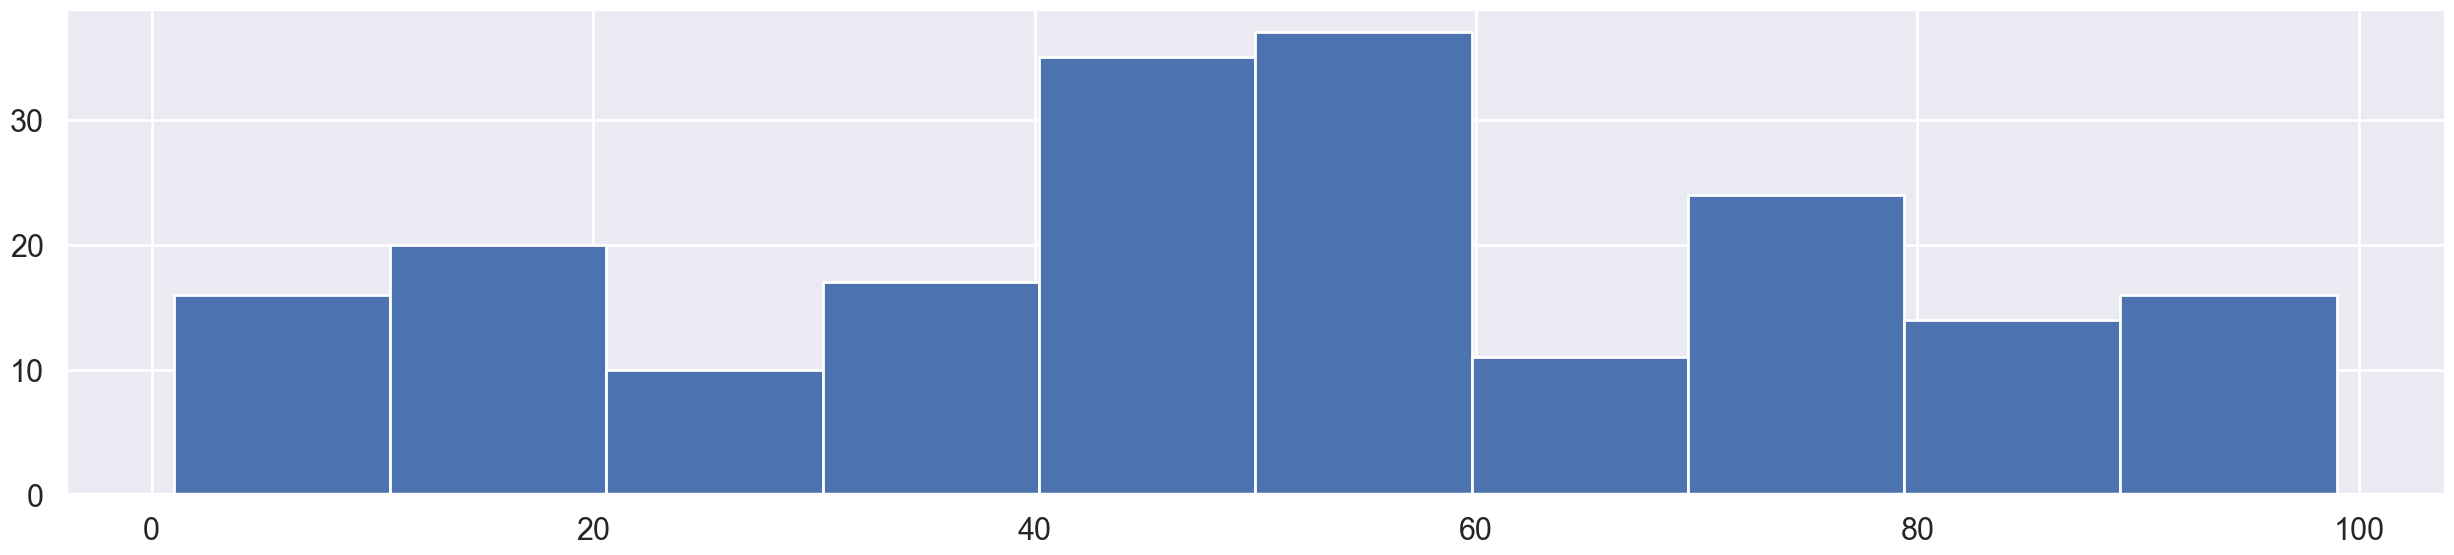

In [91]:
mall['Spending Score (1-100)'].hist()


The histogram shows that, while less than 25 customers have scores between 70 and 80, more than 35 customers have scores between 40 and 60. Thus, balanced spenders make up the majority of our clientele, followed by moderate to high spenders. Additionally, a line preceding 100 and a line following 0 to the left and right of the distribution, respectively, are visible. These blank spaces most likely indicate that neither high spenders (score of 100) nor non-spenders (score of 0) are present in the distribution.


# Visualizing the Numerical Features

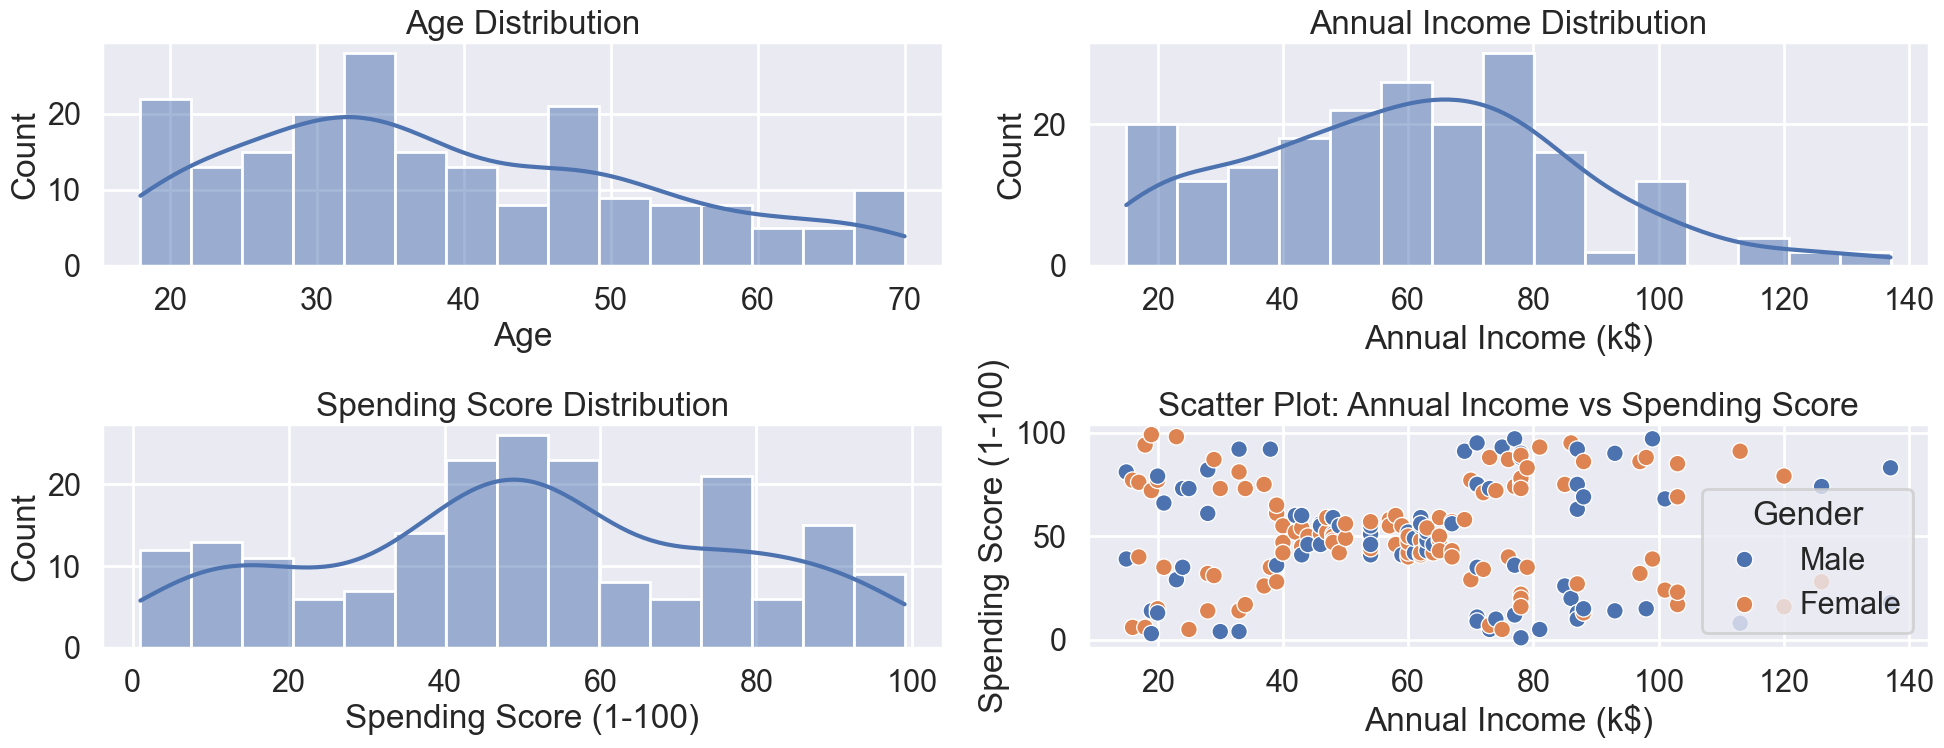

In [160]:
# Visualizations for Numerical Features
plt.figure(figsize=(20, 8))
plt.subplot(2, 2, 1)
sns.histplot(mall['Age'], bins=15, kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(mall['Annual Income (k$)'], bins=15, kde=True)
plt.title('Annual Income Distribution')

plt.subplot(2, 2, 3)
sns.histplot(mall['Spending Score (1-100)'], bins=15, kde=True)
plt.title('Spending Score Distribution')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall, hue='Gender')
plt.title('Scatter Plot: Annual Income vs Spending Score')

plt.tight_layout()
plt.show()

# Checking for Outliers

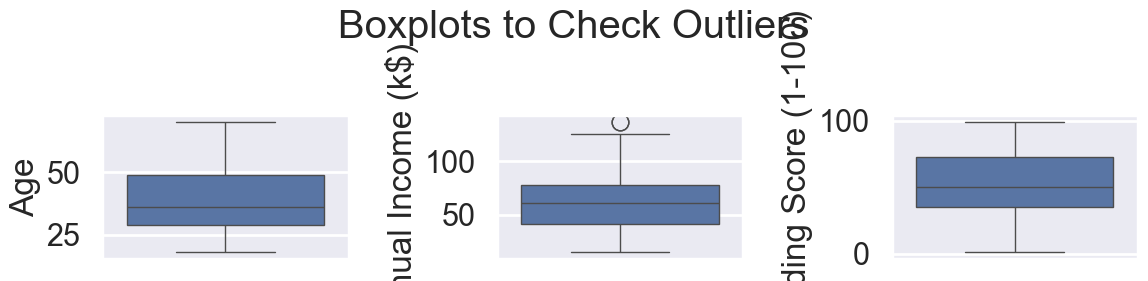

In [154]:
# Outliers check
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(cols)):
    sns.boxplot(mall[cols[i]], ax=axs[i])
fig.suptitle('Boxplots to Check Outliers')
plt.tight_layout()
plt.show()

There are no significant outliers. Considering all the above results, there is no need of data cleaning.

# Visualizing the Categorical Features

In [151]:
# Visualizations for Categorical Features
# Age bin / range
bins = [18, 22, 50, 70]
labels = ['Young', 'Adult', 'Senior']
mall['Age Range'] = pd.cut(mall['Age'], bins=bins, labels=labels, right=False)

def plot_ratio(mall):
    # For viz: Ratio of Males & Females

    x=mall.groupby(['Gender'])['Gender'].count()
    y=len(mall)
    r=((x/y)).round(2)

    mf_ratio = pd.DataFrame(r).T
    
    fig, ax = plt.subplots(1,1,figsize=(8, 3), dpi=75)

    ax.barh(mf_ratio.index, mf_ratio['Male'], 
            color='#244747', alpha=0.7, label='Male')
    ax.barh(mf_ratio.index, mf_ratio['Female'], left=mf_ratio['Male'], 
            color='#91b8bd', alpha=0.7, label='Female')

    ax.set_xlim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])

    # male percentage
    for i in mf_ratio.index:
        ax.annotate(f"{int(mf_ratio['Male'][i]*100)}%", 
                       xy=(mf_ratio['Male'][i]/2, i),
                       va = 'center', ha='center',fontsize=60, fontweight='light', fontfamily='serif',
                       color='white')

        ax.annotate("Male", 
                       xy=(mf_ratio['Male'][i]/2, -0.25),
                       va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                       color='white')


    for i in mf_ratio.index:
        ax.annotate(f"{int(mf_ratio['Female'][i]*100)}%", 
                       xy=(mf_ratio['Male'][i]+mf_ratio['Female'][i]/2, i),
                       va = 'center', ha='center',fontsize=60, fontweight='light', fontfamily='serif',
                       color='#244747')
        ax.annotate("Female", 
                       xy=(mf_ratio['Male'][i]+mf_ratio['Female'][i]/2, -0.25),
                       va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                       color='#244747')


    # Title & Subtitle
    fig.text(0.125,1.03,'Male & Female distribution', fontfamily='serif',fontsize=15, fontweight='bold')
    fig.text(0.125,0.92,'We see a fairly even split, but with slightly more females.',fontfamily='serif',fontsize=12)  

    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)

    # Removing legend due to labelled plot
    ax.legend().set_visible(False)
    plt.show()

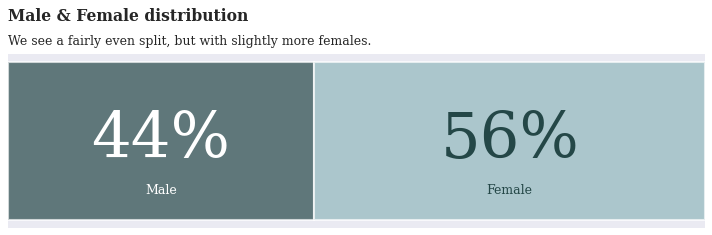

In [95]:
plot_ratio(mall)

So we have a fairly even split.

All this information will be important for interpreting our clusters later on.

Always ask then question "so what?" - If we have, for example, more females as customers, how might we advertise differently?

# Relationship among the features

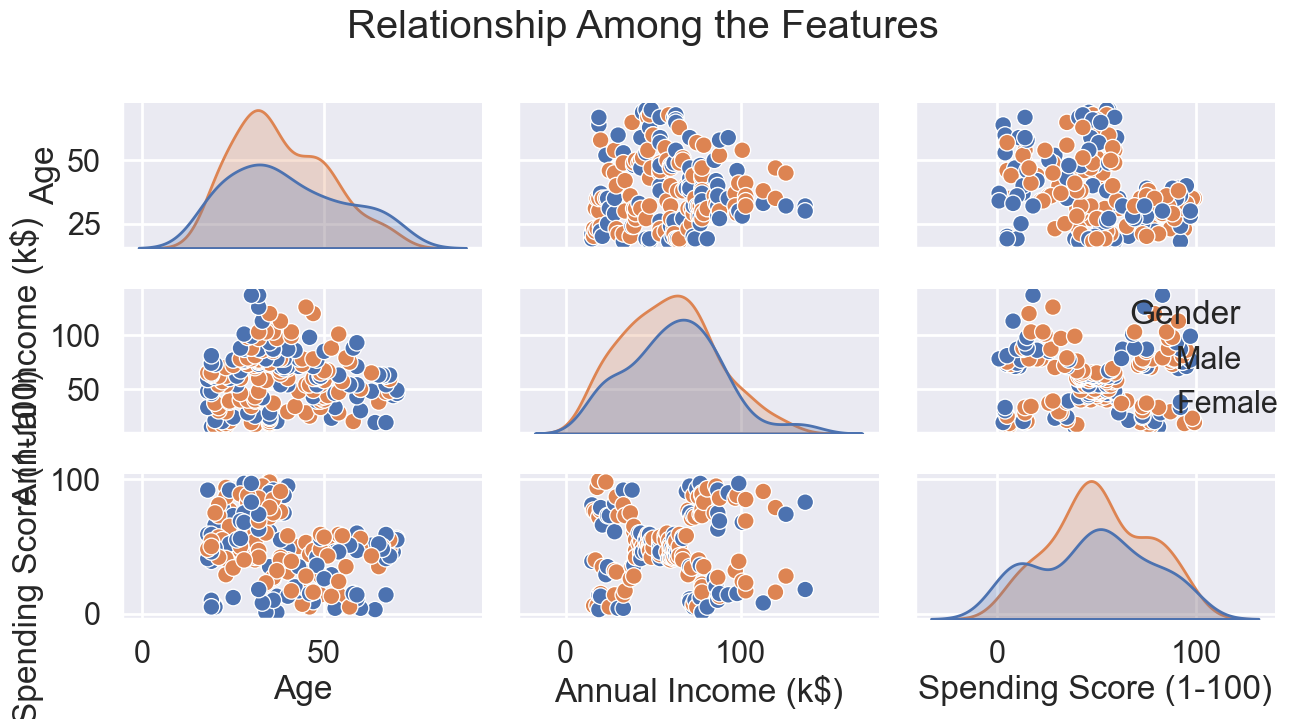

In [96]:
sns.pairplot(mall.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.suptitle('Relationship Among the Features')
plt.tight_layout()
plt.show()

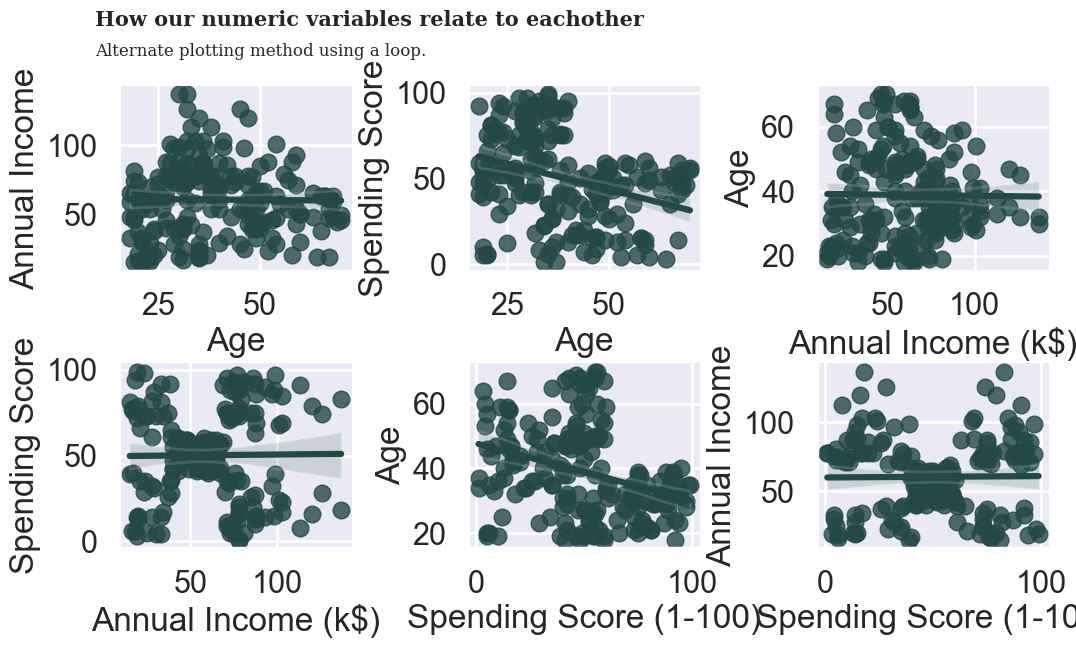

In [153]:
fig = plt.figure(figsize=(12, 6))
# Title and sub-title
fig.text(0.105, .98, 'How our numeric variables relate to eachother', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.105, .93, 'Alternate plotting method using a loop.', fontsize=12, fontweight='light', fontfamily='serif')

n = 0 

for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        if x==y: continue

        n += 1
        plt.subplot(2 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = mall,color='#244747')
        sns.despine()
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None) # useful for adjusting space between subplot

plt.show()

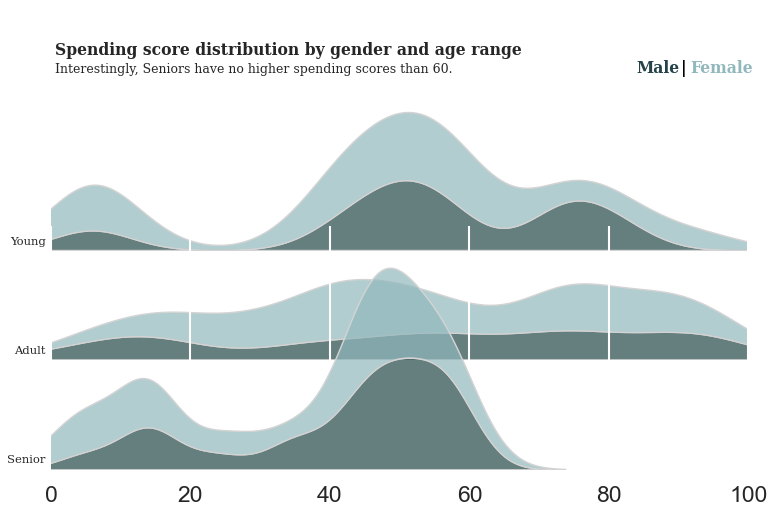

In [98]:
fig = plt.figure(figsize=(12, 8), dpi=75)
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#004c70", "#990000",'#990000']

for idx, cls, c in zip(range(4), mall['Age Range'].unique(), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))
    
    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Spending Score (1-100)', data=mall[mall['Age Range']==cls], 
                fill=True, ax=axes[idx], cut=3, bw_method=0.25, 
                lw=1.4, edgecolor='lightgray',multiple="stack", palette=['#91b8bd','#244747'], alpha=0.7,hue='Gender') 
               
    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 100)
    
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)
        
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0.001,f'{cls} ',fontweight="light", fontfamily='serif', fontsize=11,ha="right")
    if idx != 4 : axes[idx].get_legend().remove() 
    

fig.text(0.13,0.8,"Spending score distribution by gender and age range", fontweight="bold", fontfamily='serif', fontsize=15)
fig.text(0.13,0.77,'Interestingly, Seniors have no higher spending scores than 60.',fontfamily='serif',fontsize=12)

fig.text(0.776,0.77,"Male", fontweight="bold", fontfamily='serif', fontsize=15, color='#244247')
fig.text(0.825,0.77,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.835,0.77,"Female", fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')

plt.show()

In [99]:
# Some quick feature engineering, just in case
mall['Gender 1/0'] = mall['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

mall['age_band'] = mall['Age'].apply(age_band)

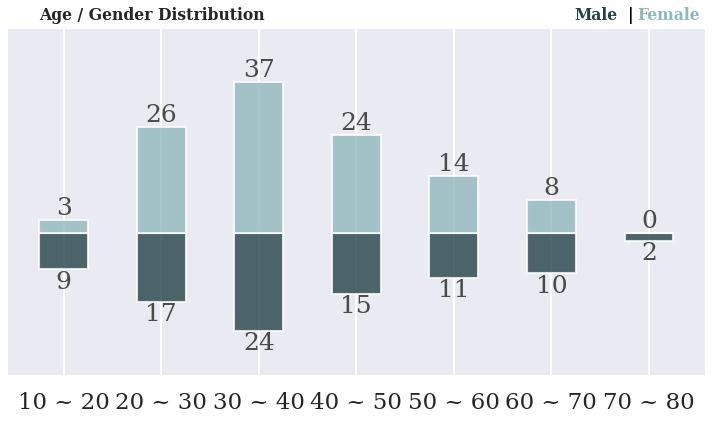

In [100]:
mf = mall.groupby('Gender')['age_band'].value_counts().unstack().sort_index().fillna(0).astype(int)


female = mf.loc['Female']
male = -mf.loc['Male']

fig, ax = plt.subplots(1,1, figsize=(12, 6), dpi=75)
ax.bar(male.index, male, width=0.5, color='#244247', alpha=0.8, label='Male')
ax.bar(female.index, female, width=0.5, color='#91b8bd', alpha=0.8, label='Female')
ax.set_ylim(-35, 50)

# Annotations
for i in female.index:
    ax.annotate(f"{female[i]}", 
                   xy=(i, female[i] + 3),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')   

for i in male.index:
    ax.annotate(f"{-male[i]}", 
                   xy=(i, male[i] - 3),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 0.9, 'Age / Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(0.755,0.9,"Male", fontweight="bold", fontfamily='serif', fontsize=15, color='#244247')
fig.text(0.815,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.9,"Female", fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')

plt.show()

# Age vs Annual Income:

<Axes: title={'center': 'Age vs Annual Income'}, xlabel='Age', ylabel='Annual Income (k$)'>

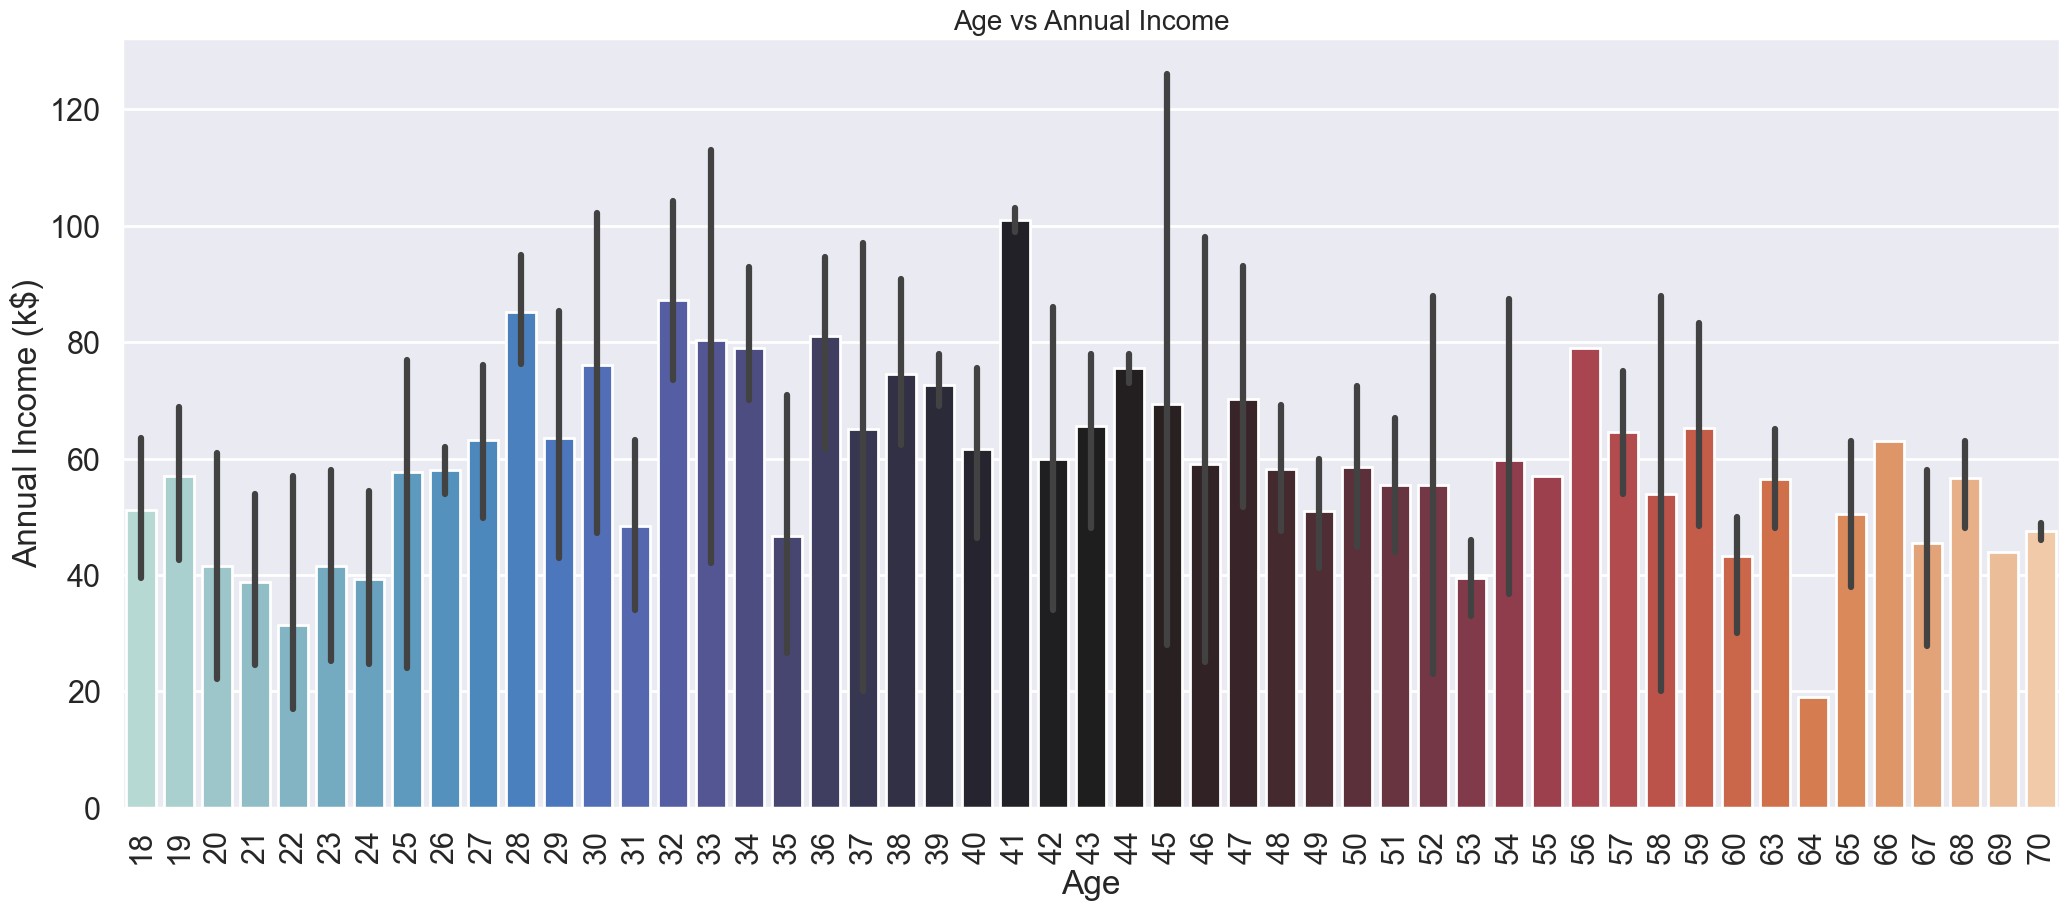

In [101]:
plt.figure(figsize=(25,10))
# Passing X axis and Y axis along with subplot position
plt.title('Age vs Annual Income', fontsize = 20)
plt.xticks(rotation=90)
sns.barplot(x = mall['Age'] , y = mall['Annual Income (k$)'] , palette='icefire')

The annual income is maximum at the age of 33 and 42.



# Age vs Spending Score:


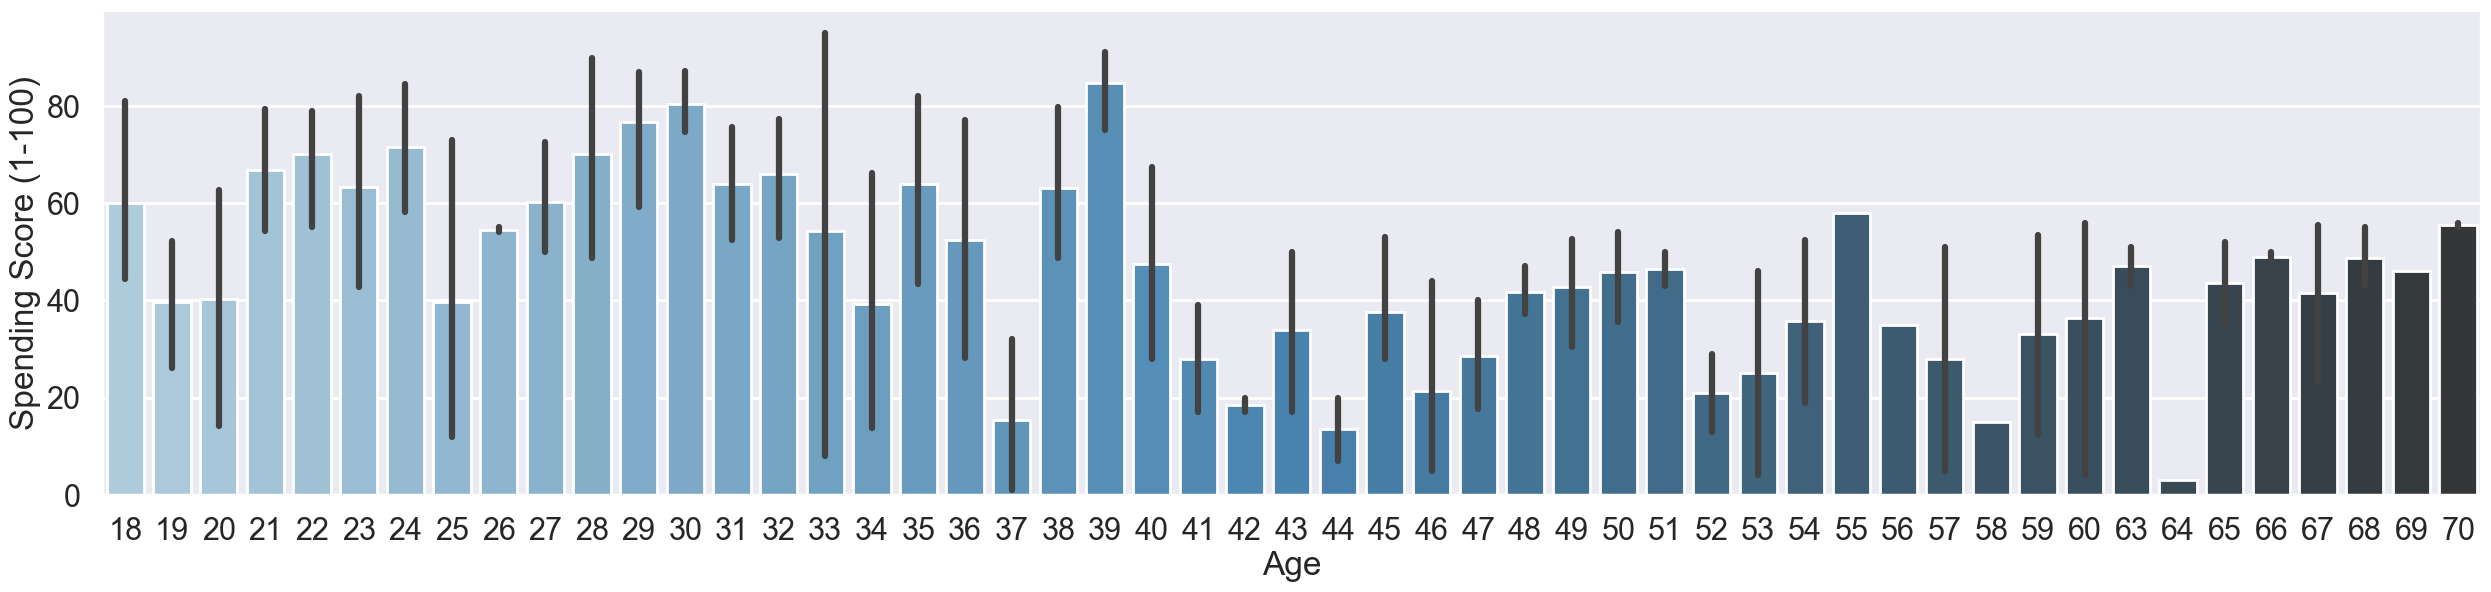

In [102]:
ax = sns.barplot(y= "Spending Score (1-100)", x = "Age", data = mall, palette=("Blues_d"))
sns.set(rc={'figure.figsize':(30.7,6.30)})
sns.set_context("poster")

We can see that the age between 28 and 39 get the maximum spending score and the reason behind it is that their annual income is very high.

# Encoding Variables and Feature Engineering

Let's start by dividing the Age into groups that vary in 10, so that we have 20-30, 30-40, 40-50, and so on. Since our youngest customer is 18, we can start at 18 and end at 70, which is the age of the oldest customer in the data. Starting at 18, and ending at 70, we would have 18-20, 20-30, 30-40, 40-50, 50-60, and 60-70 intervals.

To group or bin Age values into these intervals, we can use the Pandas cut() method to cut them into bins and then assign the bins to a new Age Groups column:

In [103]:
intervals = [18, 20, 30, 40, 50, 60, 70]
col = mall['Age']
mall['Age Groups'] = pd.cut(x=col, bins=intervals)

# To be able to look at the result stored in the variable
mall['Age Groups'] 

0      (18, 20]
1      (20, 30]
2      (18, 20]
3      (20, 30]
4      (30, 40]
         ...   
195    (30, 40]
196    (40, 50]
197    (30, 40]
198    (30, 40]
199    (20, 30]
Name: Age Groups, Length: 200, dtype: category
Categories (6, interval[int64, right]): [(18, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

Notice that when looking at the column values, there is also a line that specifies we have 6 categories and displays all the binned data intervals. This way, we have categorized our previously numerical data and created a new Age Groups feature.

And how many customers do we have in each category? We can quickly know that by grouping the column and counting the values with groupby() and count():

In [104]:
mall.groupby('Age Groups')['Age Groups'].count()


Age Groups
(18, 20]    13
(20, 30]    45
(30, 40]    60
(40, 50]    38
(50, 60]    23
(60, 70]    17
Name: Age Groups, dtype: int64

It is easy to spot that most customers are between 30 and 40 years of age, followed by customers between 20 and 30 and then customers between 40 and 50. This is also good information for the Marketing department.
    At the moment, we have two categorical variables, Age and Genre, which we need to transform into numbers to be able to use in our model. There are many different ways of making that transformation - we will use the Pandas get_dummies() method that creates a new column for each interval and genre and then fill its values with 0s and 1s- this kind of operation is called one-hot encoding. Let's see how it looks:

In [105]:
# The _oh means one-hot
customer_data_oh = pd.get_dummies(mall)
# Display the one-hot encoded dataframe
customer_data_oh 

CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender 1/0  \
0             1   19                  15                      39           1   
1             2   21                  15                      81           1   
2             3   20                  16                       6           0   
3             4   23                  16                      77           0   
4             5   31                  17                      40           0   
..          ...  ...                 ...                     ...         ...   
195         196   35                 120                      79           0   
196         197   45                 126                      28           0   
197         198   32                 126                      74           1   
198         199   32                 137                      18           1   
199         200   30                 137                      83           1   

     Gender_Female  Gender_Male  Age Range_Young  Age Range_Adult  \
0            False         True             True            False   
1            False         True             True            False   
2             True        False             True            False   
3             True        False            False             True   
4             True        False            False             True   
..             ...          ...              ...              ...   
195           True        False            False             True   
196           True        False            False             True   
197          False         True            False             True   
198          False         True            False             True   
199          False         True            False             True   

     Age Range_Senior  ...  age_band_40 ~ 50  age_band_50 ~ 60  \
0               False  ...             False             False   
1               False  ...             False             False   
2               False  ...             False             False   
3               False  ...             False             False   
4               False  ...             False             False   
..                ...  ...               ...               ...   
195             False  ...             False             False   
196             False  ...              True             False   
197             False  ...             False             False   
198             False  ...             False             False   
199             False  ...             False             False   

     age_band_60 ~ 70  age_band_70 ~ 80  Age Groups_(18, 20]  \
0               False             False                 True   
1               False             False                False   
2               False             False                 True   
3               False             False                False   
4               False             False                False   
..                ...               ...                  ...   
195             False             False                False   
196             False             False                False   
197             False             False                False   
198             False             False                False   
199             False             False                False   

     Age Groups_(20, 30]  Age Groups_(30, 40]  Age Groups_(40, 50]  \
0                  False                False                False   
1                   True                False                False   
2                  False                False                False   
3                   True                False                False   
4                  False                 True                False   
..                   ...                  ...                  ...   
195                False                 True                False   
196                False                False                 True   
197                Fals

# Basic Plotting and Dimensionality Reduction


Our dataset has 11 columns, and there are some ways in which we can visualize that data. The first one is by plotting it in 10-dimensions (good luck with that). Ten because the Customer_ID column is not being considered. The second one is by plotting our initial numerical features, and the third is by transforming our 10 features into 2 - therefore, performing a dimensionality reduction.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

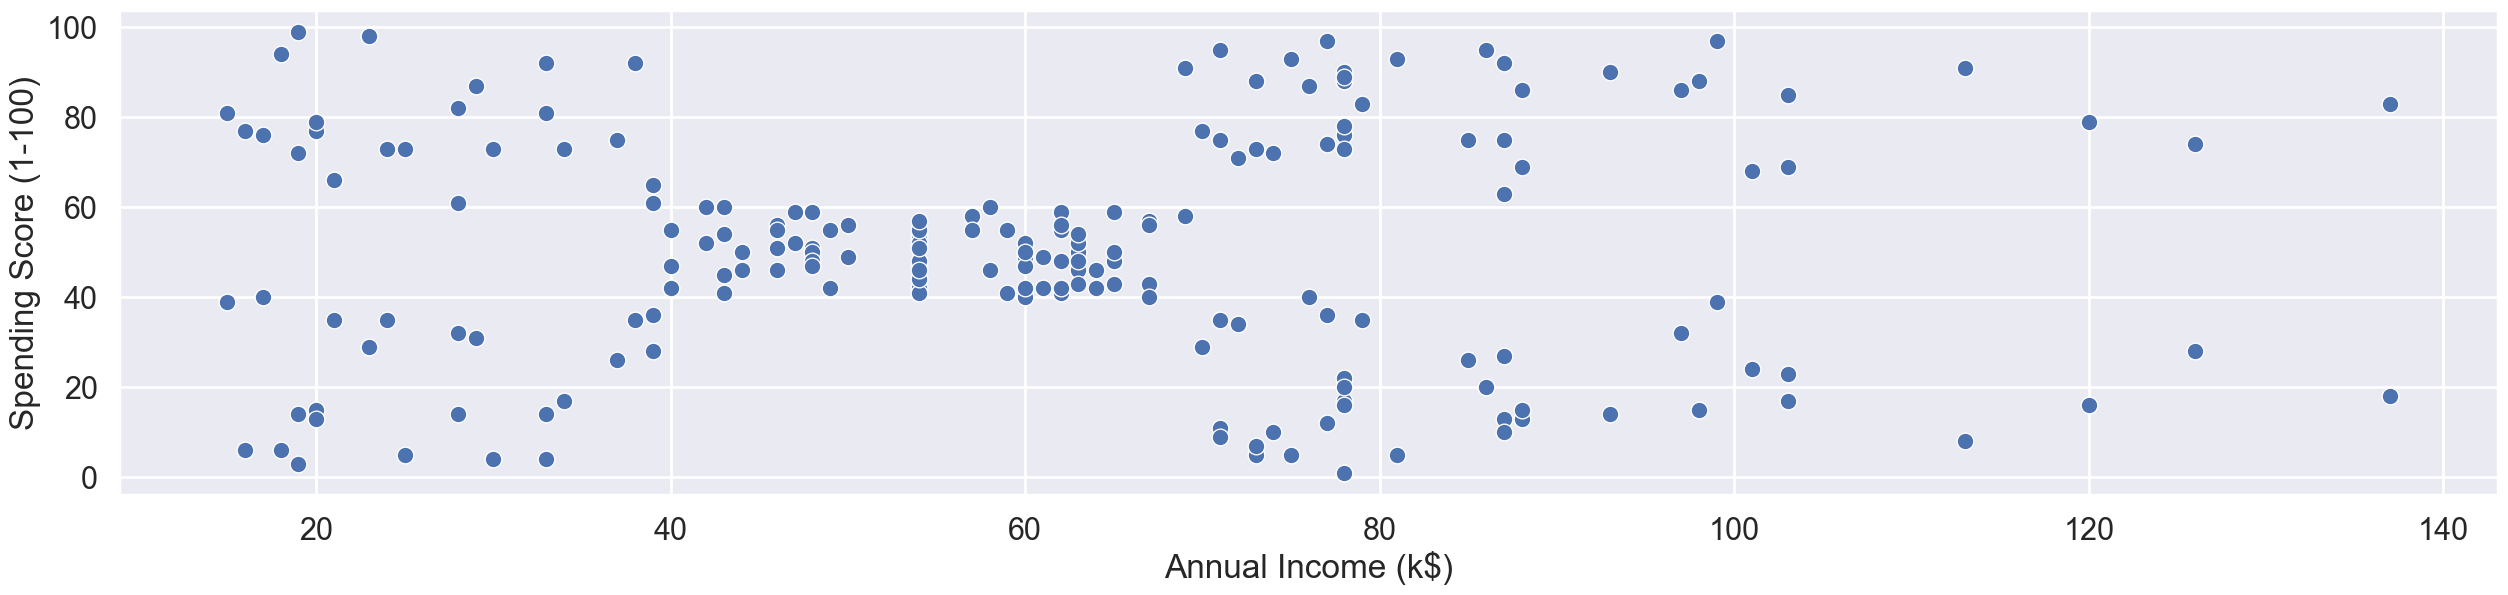

In [106]:
sns.scatterplot(x=mall['Annual Income (k$)'],
                y=mall['Spending Score (1-100)'])

By looking closer, we can definitely distinguish 5 different groups of data. It seems our customers can be clustered based on how much they make in a year and how much they spend. This is another relevant point in our analysis. It is important that we are only taking two features into consideration to group our clients. Any other information we have about them is not entering the equation. This gives the analysis meaning - if we know how much a client earns and spends, we can easily find the similarities we need.

# Plotting Data After Using PCA

Before applying PCA, we need to choose between the Age column or the Age Groups columns in our previously one-hot encoded data. Since both columns represent the same information, introducing it twice affects our data variance. If the Age Groups column is chosen, simply remove the Age column using the Pandas drop() method and reassign it to the customer_data_oh variable:

In [107]:
customer_data_oh = customer_data_oh.drop(['Age','CustomerID'], axis=1)
customer_data_oh.shape 

(200, 21)

In [108]:
pca = PCA(n_components=10)
pca.fit_transform(customer_data_oh)
pca.explained_variance_ratio_.cumsum()

array([0.50880332, 0.99805475, 0.99862483, 0.99902278, 0.9993435 ,
       0.9995769 , 0.99974022, 0.9998683 , 0.99990666, 0.9999367 ])

We can see that the first dimension explains 50% of the data, and when combined to the second dimension, they explain 99% percent. This means that the first 2 dimensions already explain 99% of our data. So we can apply a PCA with 2 components, obtain our principal components and plot them:



<Axes: >

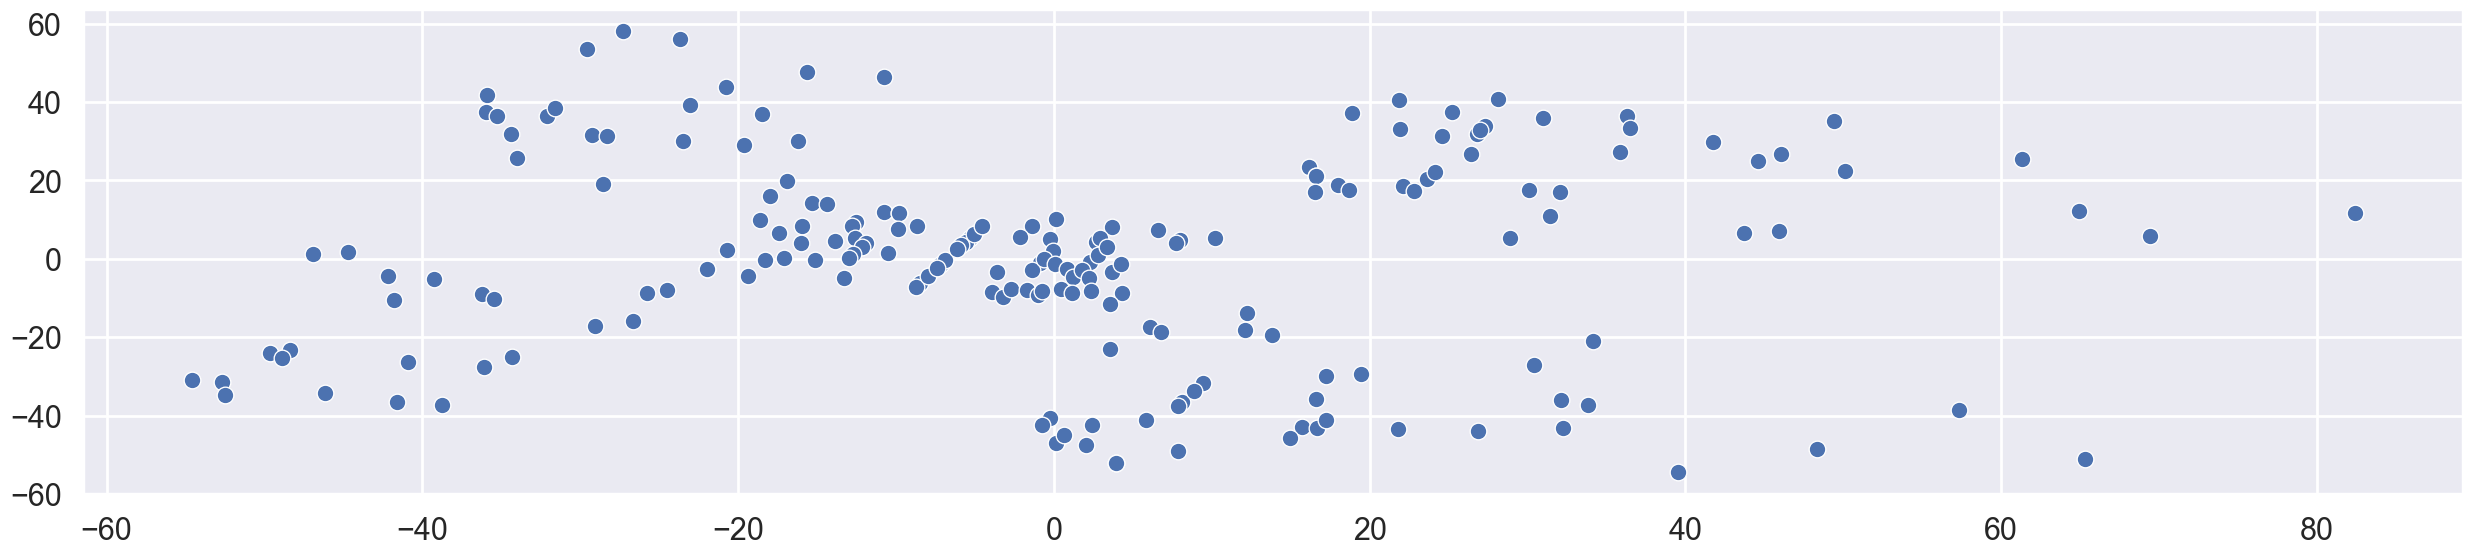

In [109]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(customer_data_oh)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

The data plot after PCA is very similar to the plot that is using only two columns of the data without PCA. Notice that the points that are forming groups are closer, and a little more concentrated after the PCA than before.

# Visualizing Hierarchical Structure with Dendrograms

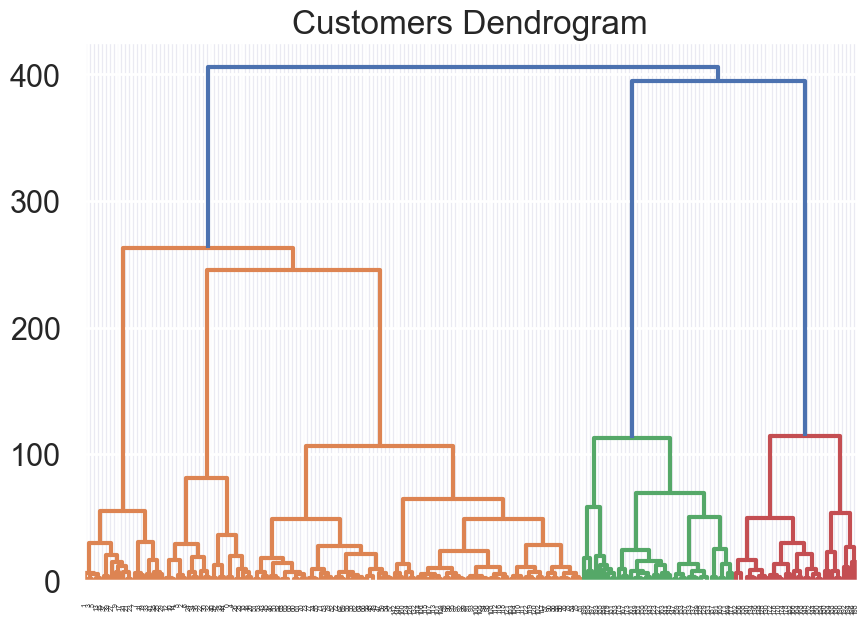

In [110]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = customer_data_oh.iloc[:, 0:3]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

# Linkage Methods & Distance Metrics



I have chosen Ward and Euclidean for the dendrogram because they are the most commonly used method and metric. They usually give good results since Ward links points based on minimizing the errors, and Euclidean works well in lower dimensions.



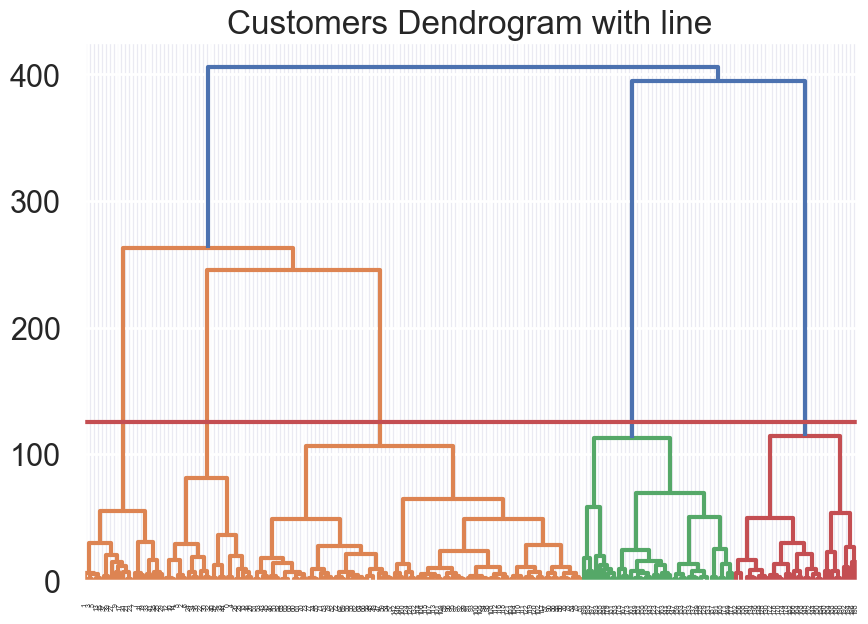

In [111]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'r', linestyle = '-')

After locating the horizontal line, I count how many times our vertical lines were crossed by it - in this paper , 5 times. So 5 seems a good indication of the number of clusters that have the most distance between them.

# Implementing an Agglomerative Hierarchical Clustering


## Using Original Data


In [112]:
clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Text(0.5, 1.0, 'Labeled Customer Data')

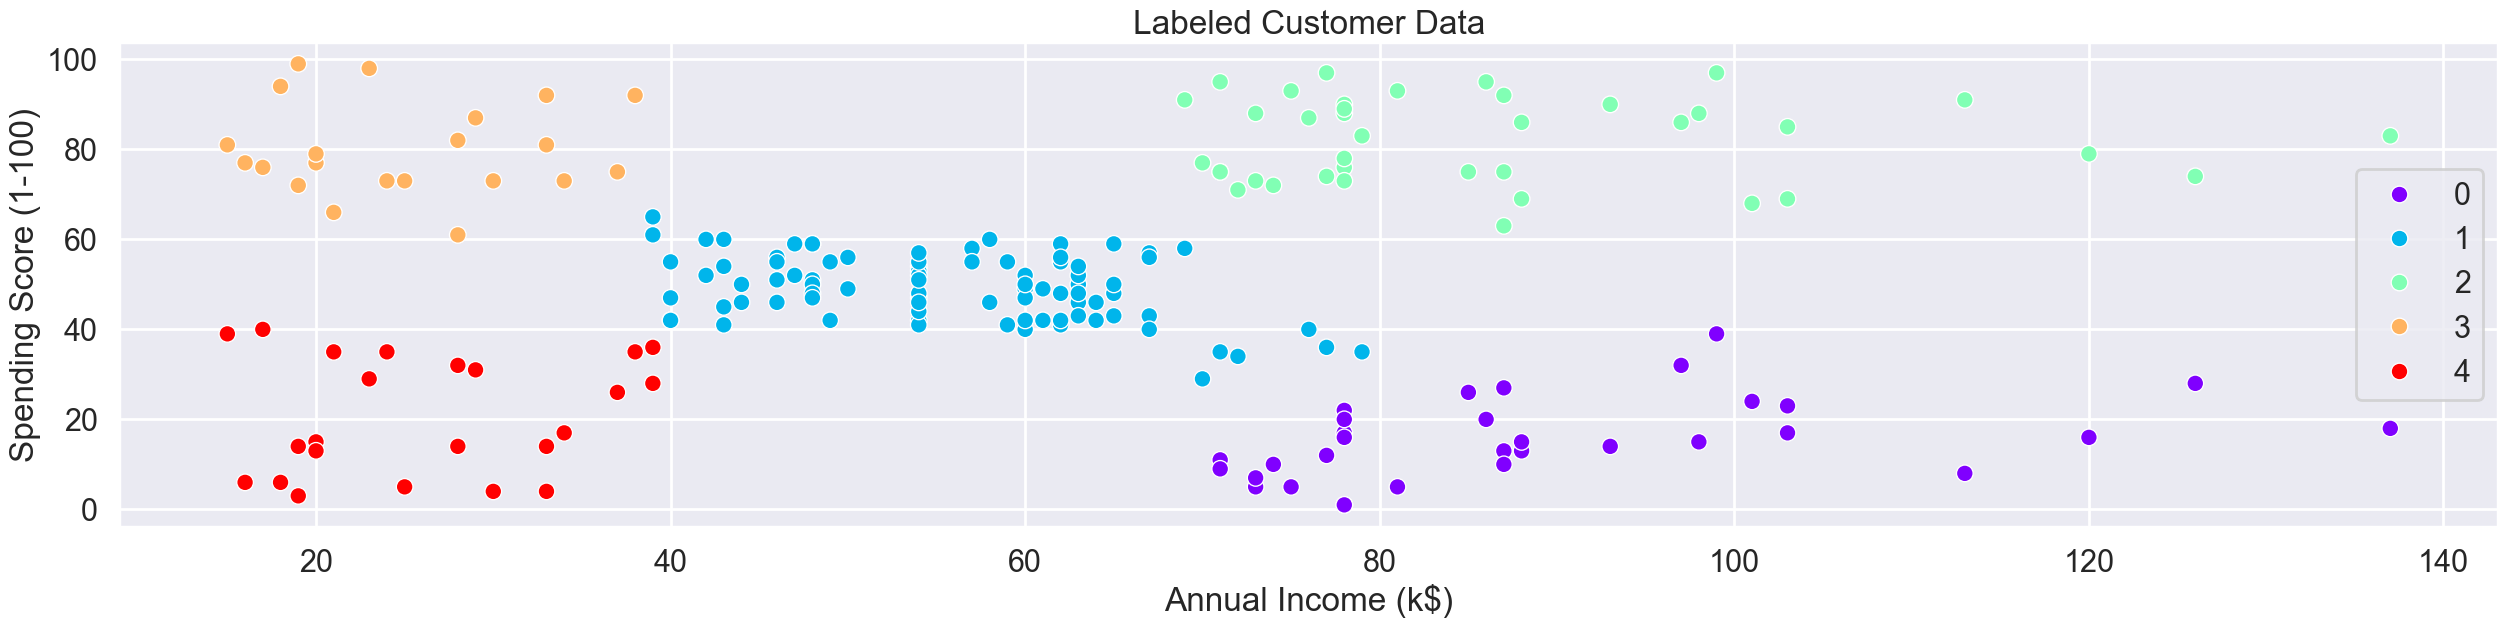

In [113]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Customer Data')

This is our final "cluster-ized" data. You can see the color-coded data points in the form of five clusters.

The data points in the bottom right (label: 0, purple data points) belong to the customers with high salaries but low spending. These are the customers that spend their money carefully.

Similarly, the customers at the top right (label: 2, green data points), are the customers with high salaries and high spending. These are the type of customers that companies target.

The customers in the middle (label: 1, blue data points) are the ones with average income and average spending. The highest numbers of customers belong to this category. Companies can also target these customers given the fact that they are in huge numbers.

The customers in the bottom left (label: 4, red) are the customers that have low salaries and low spending, they might be attracted by offering promotions.

And finally, the customers in the upper left (label: 3, orange data points) are the ones with high income and low spending, which are ideally targeted by marketing.

# Using the Result from PCA to implementing an Agglomerative Hierarchical Clustering


If we were in a different scenario, in which we had to reduce the dimensionality of data. We could also easily plot the "cluster-ized" PCA results. That can be done by creating another agglomerative clustering model and obtaining a data label for each principal component:

Text(0.5, 1.0, 'Labeled Customer Data Reduced with PCA')

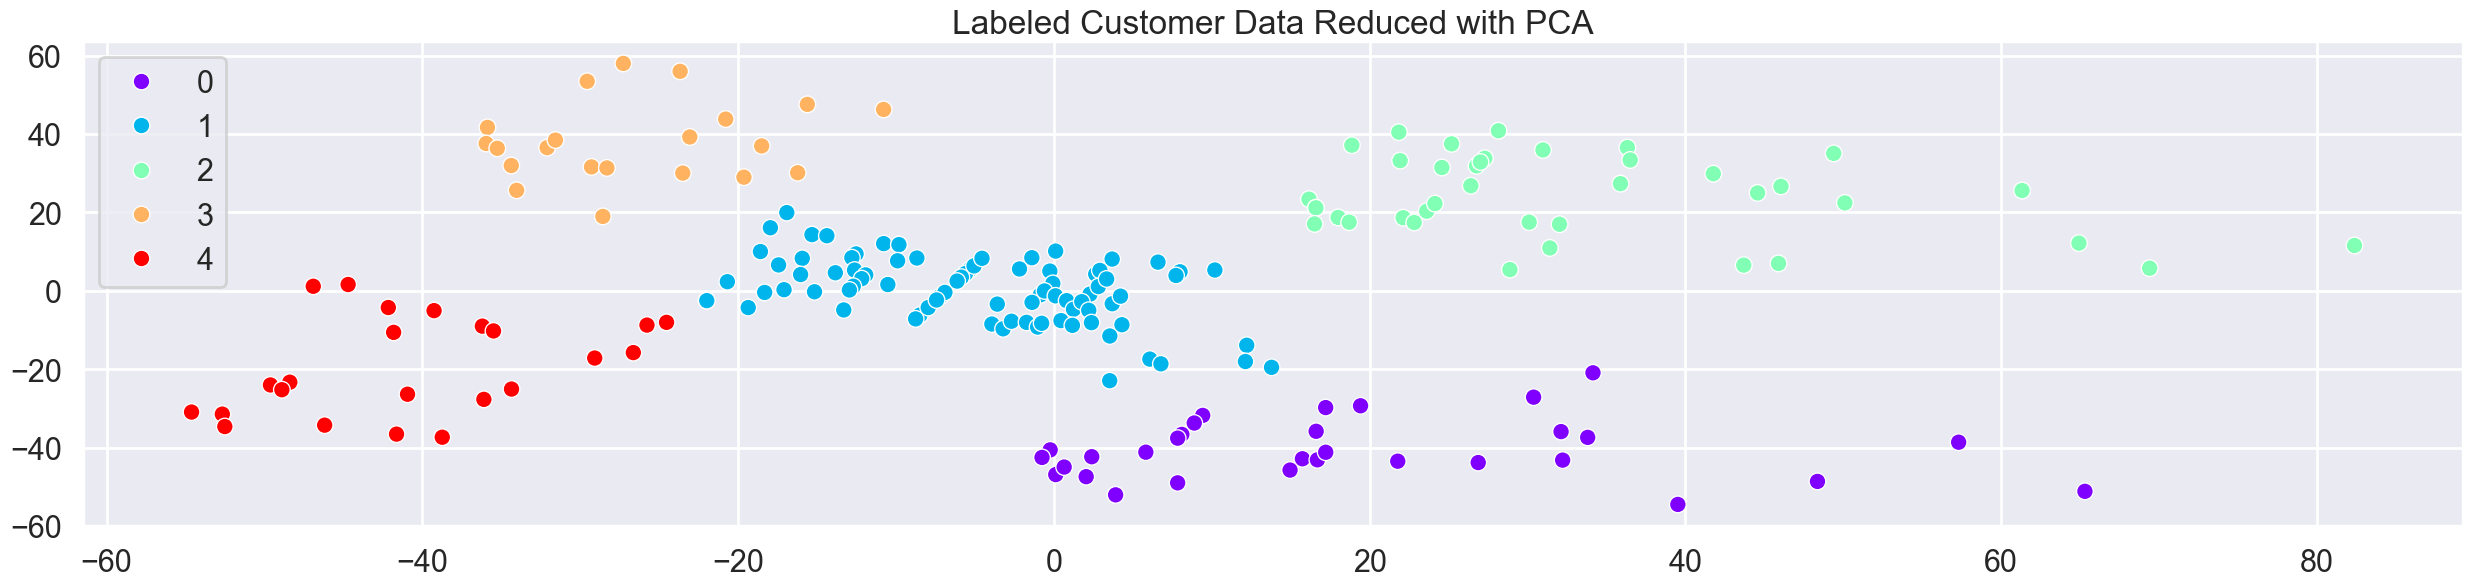

In [114]:
clustering_model_pca = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model_pca.fit(pcs)

data_labels_pca = clustering_model_pca.labels_

sns.scatterplot(x=pc1_values, 
                y=pc2_values,
                hue=data_labels_pca,
                palette="rainbow").set_title('Labeled Customer Data Reduced with PCA')

Observe that both results are very similar. The main difference is that the first result with the original data is much easier to explain. It is clear to see that customers can be divided into five groups by their annual income and spending score. While, in the PCA approach, we are taking all of our features into consideration, as much as we can look at the variance explained by each of them, this is a harder concept to grasp, especially when reporting to a Marketing department.

# Implementing an Divisive Hierarchical Clustering

In [115]:
# Extracting relevant features for clustering
X = mall[['Annual Income (k$)', 'Spending Score (1-100)']]

In [116]:
# Perform divisive clustering using AgglomerativeClustering with linkage='complete'
model = AgglomerativeClustering(n_clusters=None, distance_threshold=20, linkage='complete')
y_divisive = model.fit_predict(X)

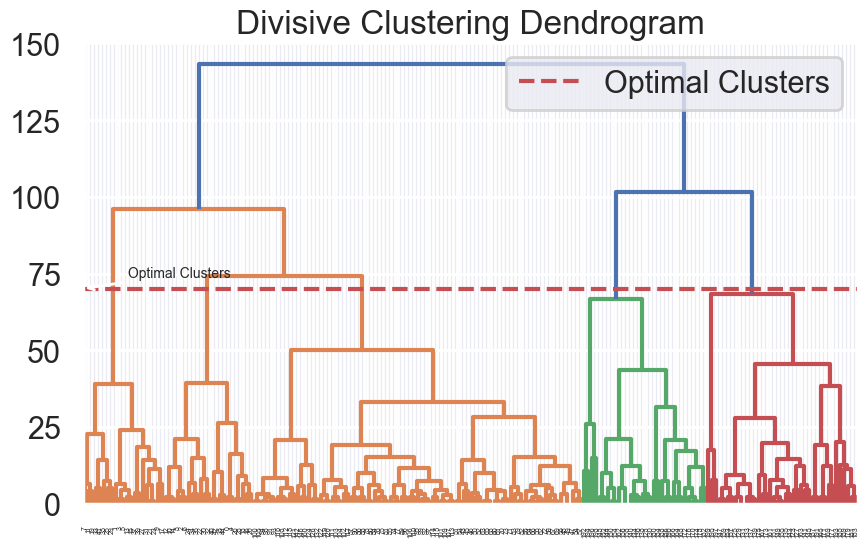

In [117]:
# Plot the divisive clustering dendrogram
plt.figure(figsize=(10, 6))
plt.title('Divisive Clustering Dendrogram')
dendrogram = shc.dendrogram(shc.linkage(X, method='complete'))

# Draw a horizontal line at the height that indicates the optimal number of clusters
optimal_height = 70  # Adjust this threshold based on your analysis
plt.axhline(y=optimal_height, color='r', linestyle='--', label='Optimal Clusters')

# Annotate the optimal number of clusters
plt.annotate('Optimal Clusters', xy=(0, optimal_height), xytext=(250, optimal_height + 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, ha='center', va='center')

plt.legend()
plt.show()

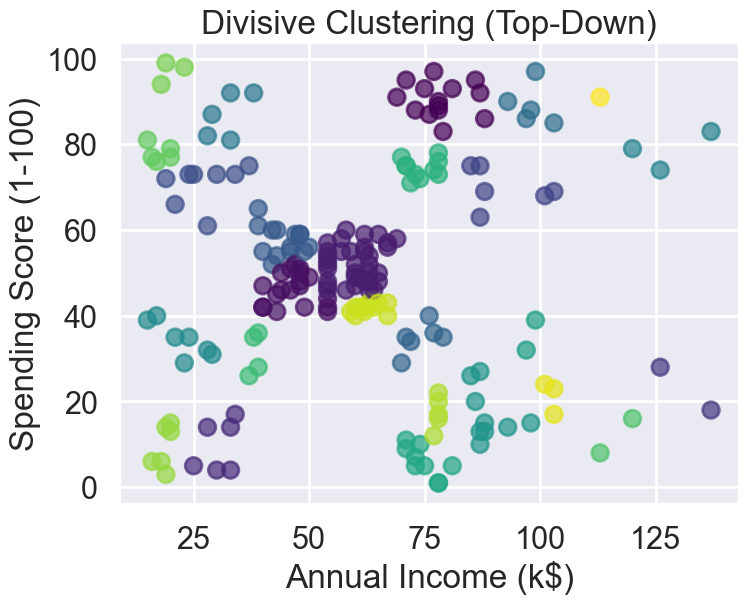

In [118]:
# Visualize the divisive clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_divisive, cmap='viridis', alpha=0.7)
plt.title('Divisive Clustering (Top-Down)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# KNN Clustering

## Elbow Method

Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k.

It is an empirical method to find out the best value of k. It picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.

When the value of k is 1, the within-cluster sum of the square will be high. As the value of k increases, the within-cluster sum of square value will decrease.

Finally, we will plot a graph between k-values and the within-cluster sum of the square to get the k value. we will examine the graph carefully. At some point, our graph will decrease abruptly. That point will be considered as a value of k.

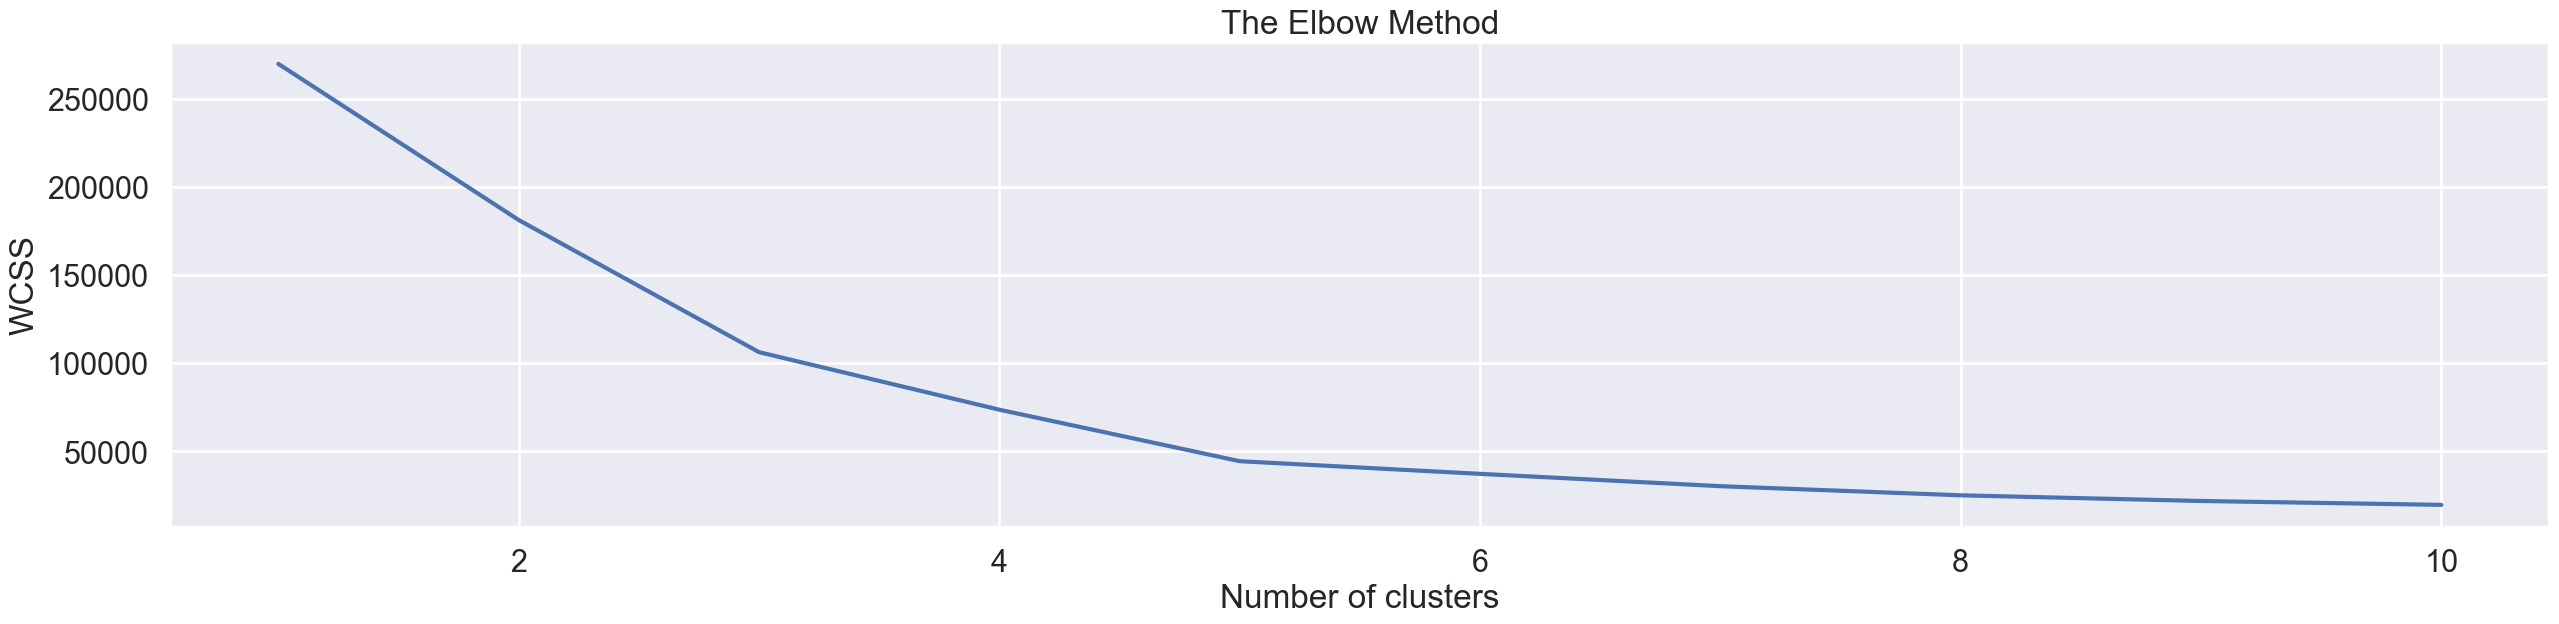

In [119]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(selected_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [120]:
# Applying k-means to the mall dataset
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(selected_data)
print(y_kmeans)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


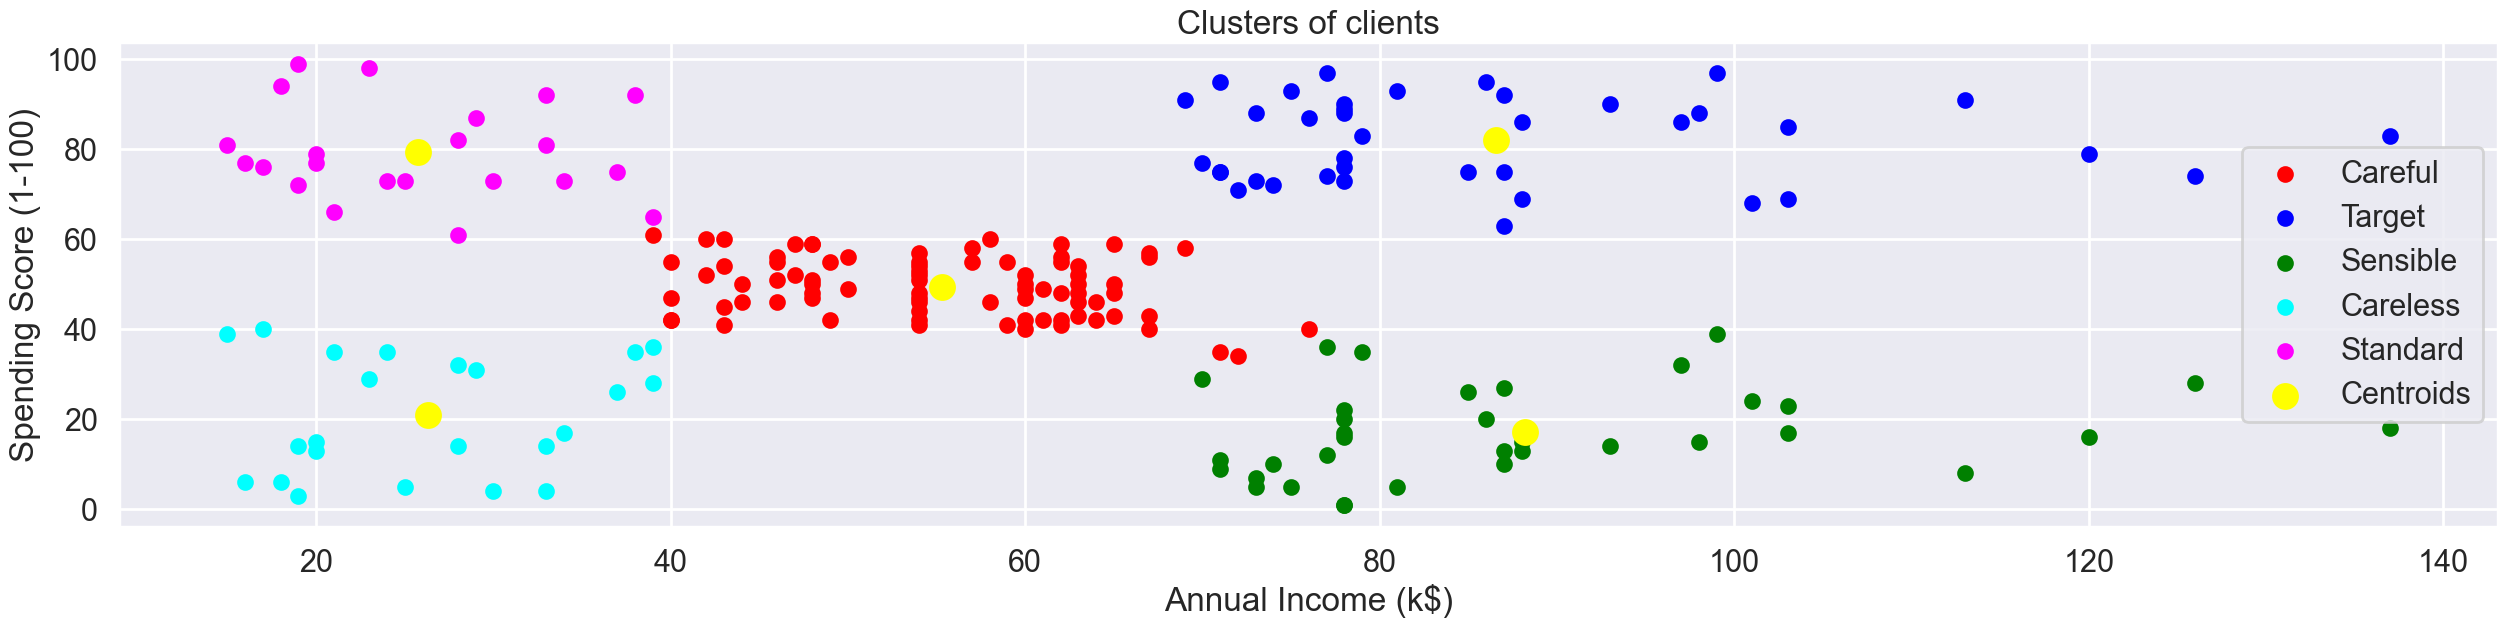

In [121]:
# Visualizing the clusters
new_selected_data = np.array(selected_data) #that all

plt.scatter(new_selected_data[y_kmeans == 0, 0],new_selected_data[y_kmeans== 0,1],s=100,c='red',label="Careful")
plt.scatter(new_selected_data[y_kmeans == 1, 0],new_selected_data[y_kmeans== 1,1],s=100,c='blue',label="Target")
plt.scatter(new_selected_data[y_kmeans == 2, 0],new_selected_data[y_kmeans== 2,1],s=100,c='green',label="Sensible")
plt.scatter(new_selected_data[y_kmeans == 3, 0],new_selected_data[y_kmeans== 3,1],s=100,c='cyan',label="Careless")
plt.scatter(new_selected_data[y_kmeans == 4, 0],new_selected_data[y_kmeans== 4,1],s=100,c='magenta',label="Standard")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# KNN Clustering with Scaled Data


In [122]:
#Selecting columns for clusterisation with k-means
selected_cols = ["Spending Score (1-100)", "Annual Income (k$)", "Age"]
cluster_data = mall.loc[:,selected_cols]

In [123]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

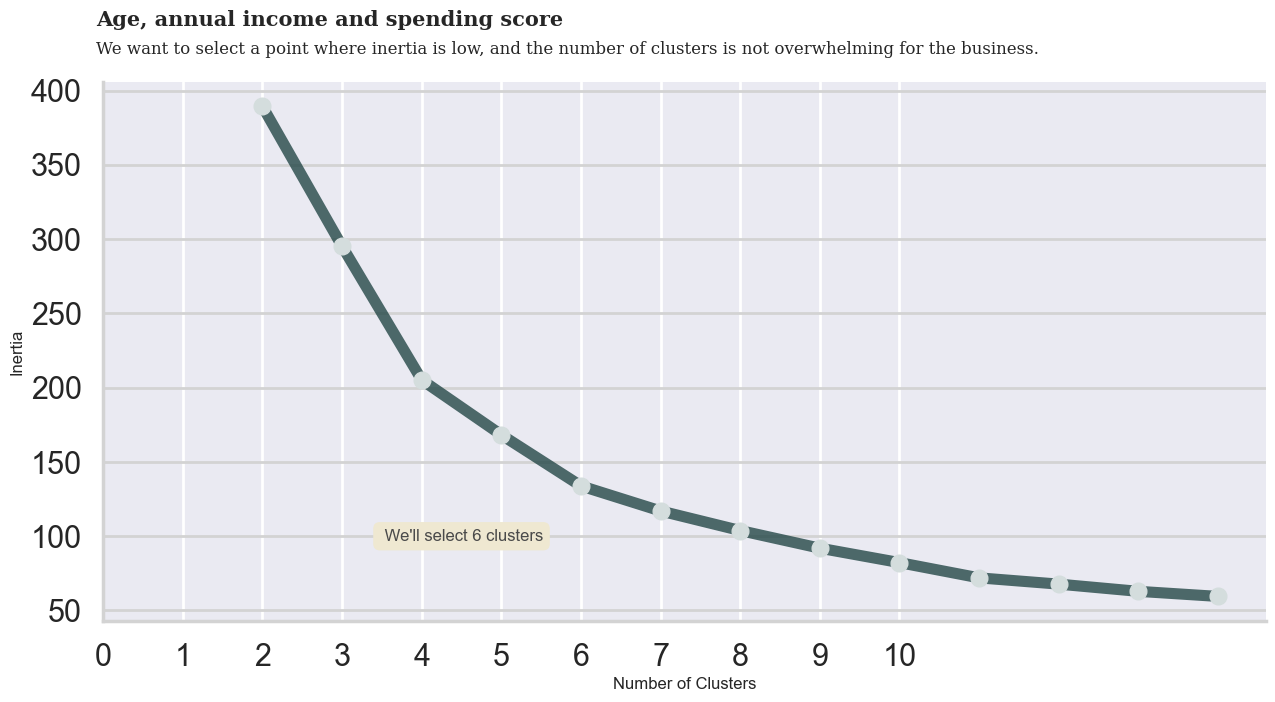

In [124]:
fig, ax = plt.subplots(figsize=(15,7))

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(clusters_range,inertias, '-' , color='#244747',alpha = 0.8,linewidth=8)
plt.plot(clusters_range,inertias, 'o',linewidth=20,color='#d4dddd')    

##
plt.xlabel('Number of Clusters',fontsize=12) , plt.ylabel('Inertia',fontsize=12)
ax.xaxis.set_ticks(np.arange(0,11,1))

# Title & Subtitle
fig.text(0.12,0.96,'Age, annual income and spending score', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.12,0.92,'We want to select a point where inertia is low, and the number of clusters is not overwhelming for the business.',fontfamily='serif',fontsize=12)


ax.annotate(" We'll select 6 clusters", 
            xy=(4.5, 100), fontsize=12,
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))

# Ax spines
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
for s in ['left', 'bottom']:
    ax.spines[s].set_color('lightgray')

# Grid
ax.set_axisbelow(True)# Ax spines

ax.yaxis.grid(color='lightgray', linestyle='-')
plt.show()

In [125]:
# Running various cluster numbers with various random seeds
clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        #print("For N_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])

In [126]:
# Turn results in to a pivot table
result = pd.DataFrame(results, columns=["Number of clusters","Random seed","Silhouette_score"])
pivot_km = pd.pivot_table(result, index="Number of clusters", columns="Random seed",values="Silhouette_score")

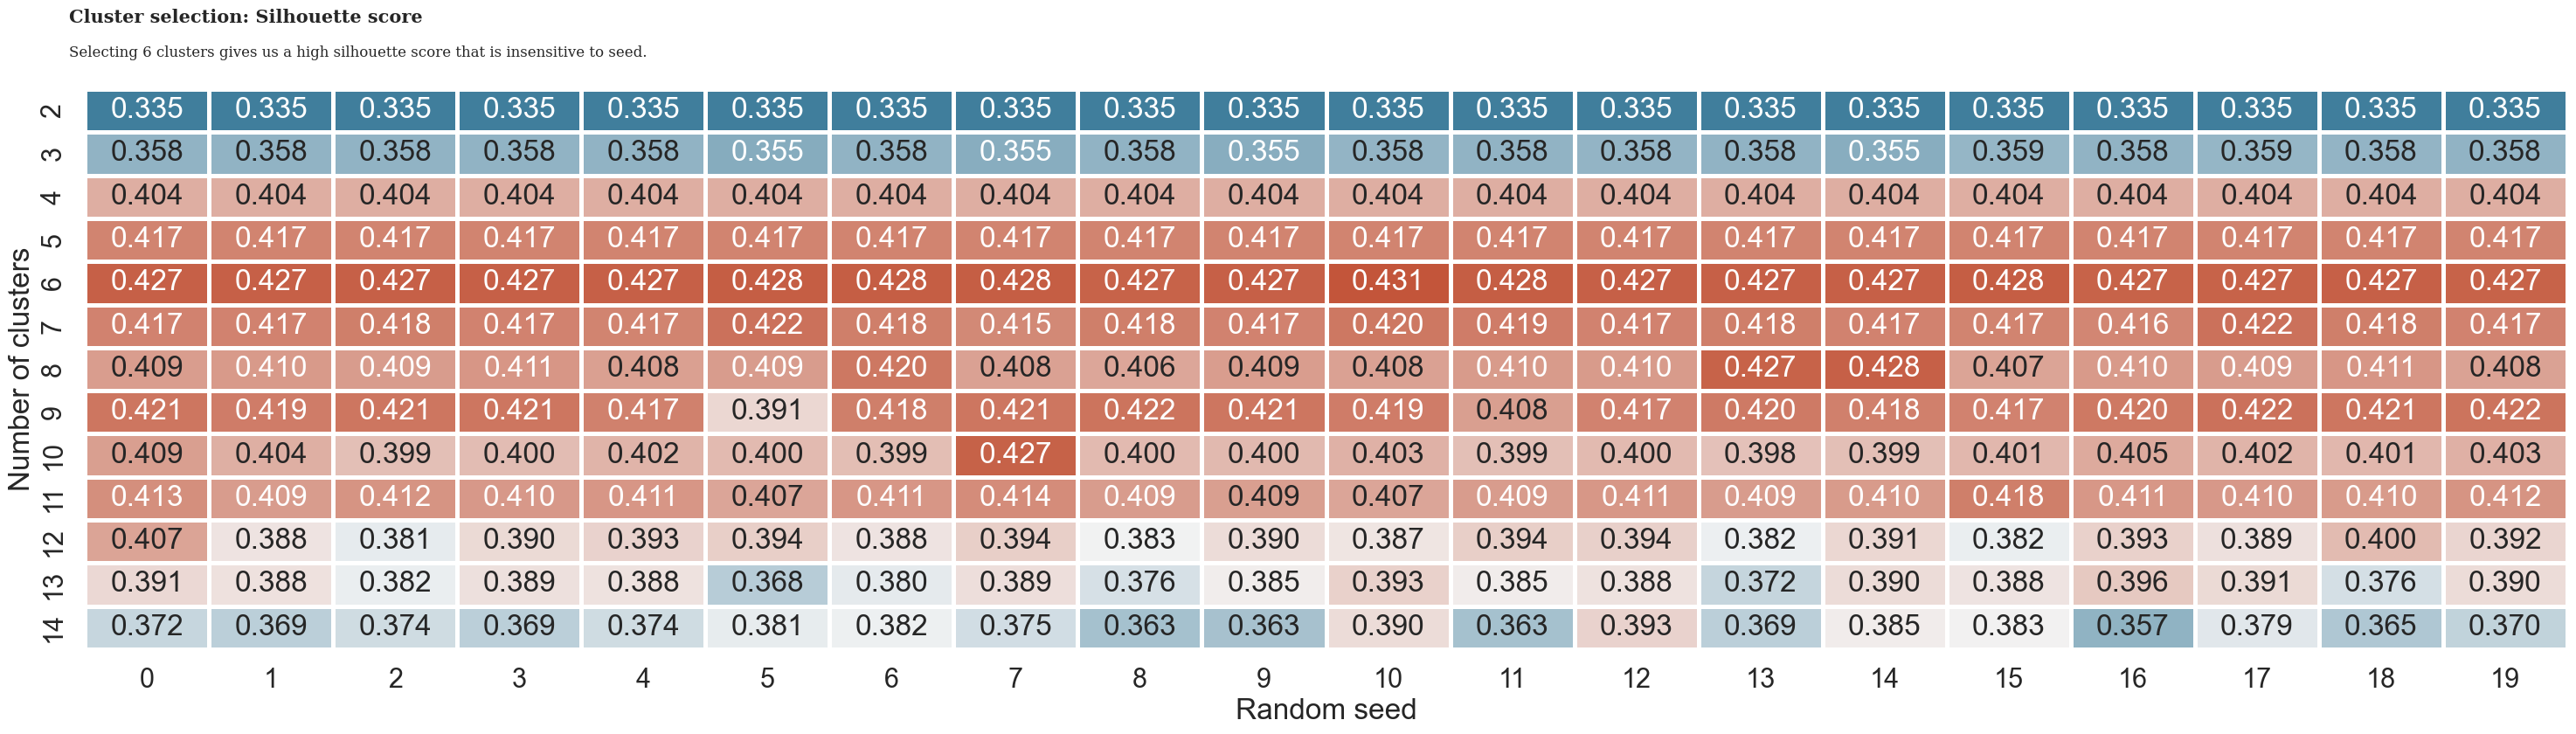

In [127]:
# Turn that pivot in to a nice visual
fig = plt.figure(figsize=(30, 8))

# Title and sub-title

fig.text(0.035, 1.05, 'Cluster selection: Silhouette score', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.035, 1.001, 'Selecting 6 clusters gives us a high silhouette score that is insensitive to seed.', fontsize=12, fontweight='light', fontfamily='serif')

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(pivot_km, annot=True, linewidths=2.5, fmt='.3f', cmap=cmap,cbar=False)

plt.tight_layout()

In [128]:
# Six looks to be a good number of clusters. We will also assign these clusters to a df
kmeans_sel = KMeans(n_clusters=6, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

For n_clusters = 6  and seed = 19 
The average silhouette_score is : 0.42742814991580175


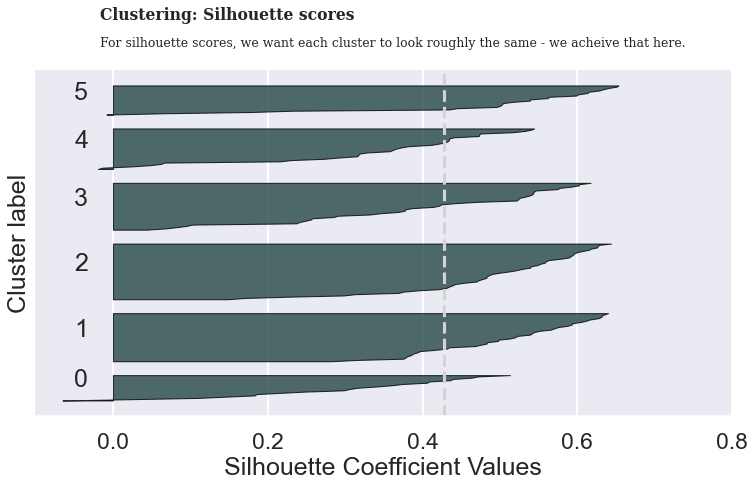

In [129]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

clusterer = KMeans(n_clusters=6, random_state=1)
cluster_labels = clusterer.fit_predict(cluster_scaled)
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
print("For n_clusters =", 6," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(cluster_scaled, cluster_labels)

fig, ax = plt.subplots(figsize=(12,6), dpi=75)

y_lower = 10
for i in range(6):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 6)
    ax.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor='#244747', edgecolor="black",linewidth=1, alpha=0.8)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
    
    
fig.text(0.198, .99, 'Clustering: Silhouette scores', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.198,.93, 'For silhouette scores, we want each cluster to look roughly the same - we acheive that here.', fontsize=12, fontweight='light', fontfamily='serif')
    
ax.get_yaxis().set_ticks([])
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="lightgray", linestyle="--")
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8])
for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)
    
plt.show()

Silhouette score concepts:
Silhouette score for a set of sample data points is used to measure how dense and well-separated the clusters are.
Silhouette score takes into consideration the intra-cluster distance between the sample and other data points within the same cluster (a) and inter-cluster distance between the sample and the next nearest cluster (b).
The silhouette score falls within the range [-1, 1].
The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.
The silhouette plots can be used to select the most optimal value of the K (no. of cluster) in K-means clustering.
The aspects to look out for in Silhouette plots are cluster scores below the average silhouette score, wide fluctuations in the size of the clusters, and also the thickness of the silhouette plot.

In [130]:
clustered_data.head()


Spending Score (1-100)  Annual Income (k$)  Age  Cluster
0                      39                  15   19        5
1                      81                  15   21        5
2                       6                  16   20        0
3                      77                  16   23        5
4                      40                  17   31        0

In [131]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km2 = clustered_data.groupby(['Cluster']).mean().round(1).reset_index()
grouped_km2['Cluster'] = grouped_km2['Cluster'].map(str)
grouped_km2

Cluster  Spending Score (1-100)  Annual Income (k$)   Age
0       0                    19.4                26.3  45.5
1       1                    82.1                86.5  32.7
2       2                    49.1                54.3  56.3
3       3                    47.8                57.6  26.7
4       4                    17.0                88.9  41.9
5       5                    76.9                25.8  25.2

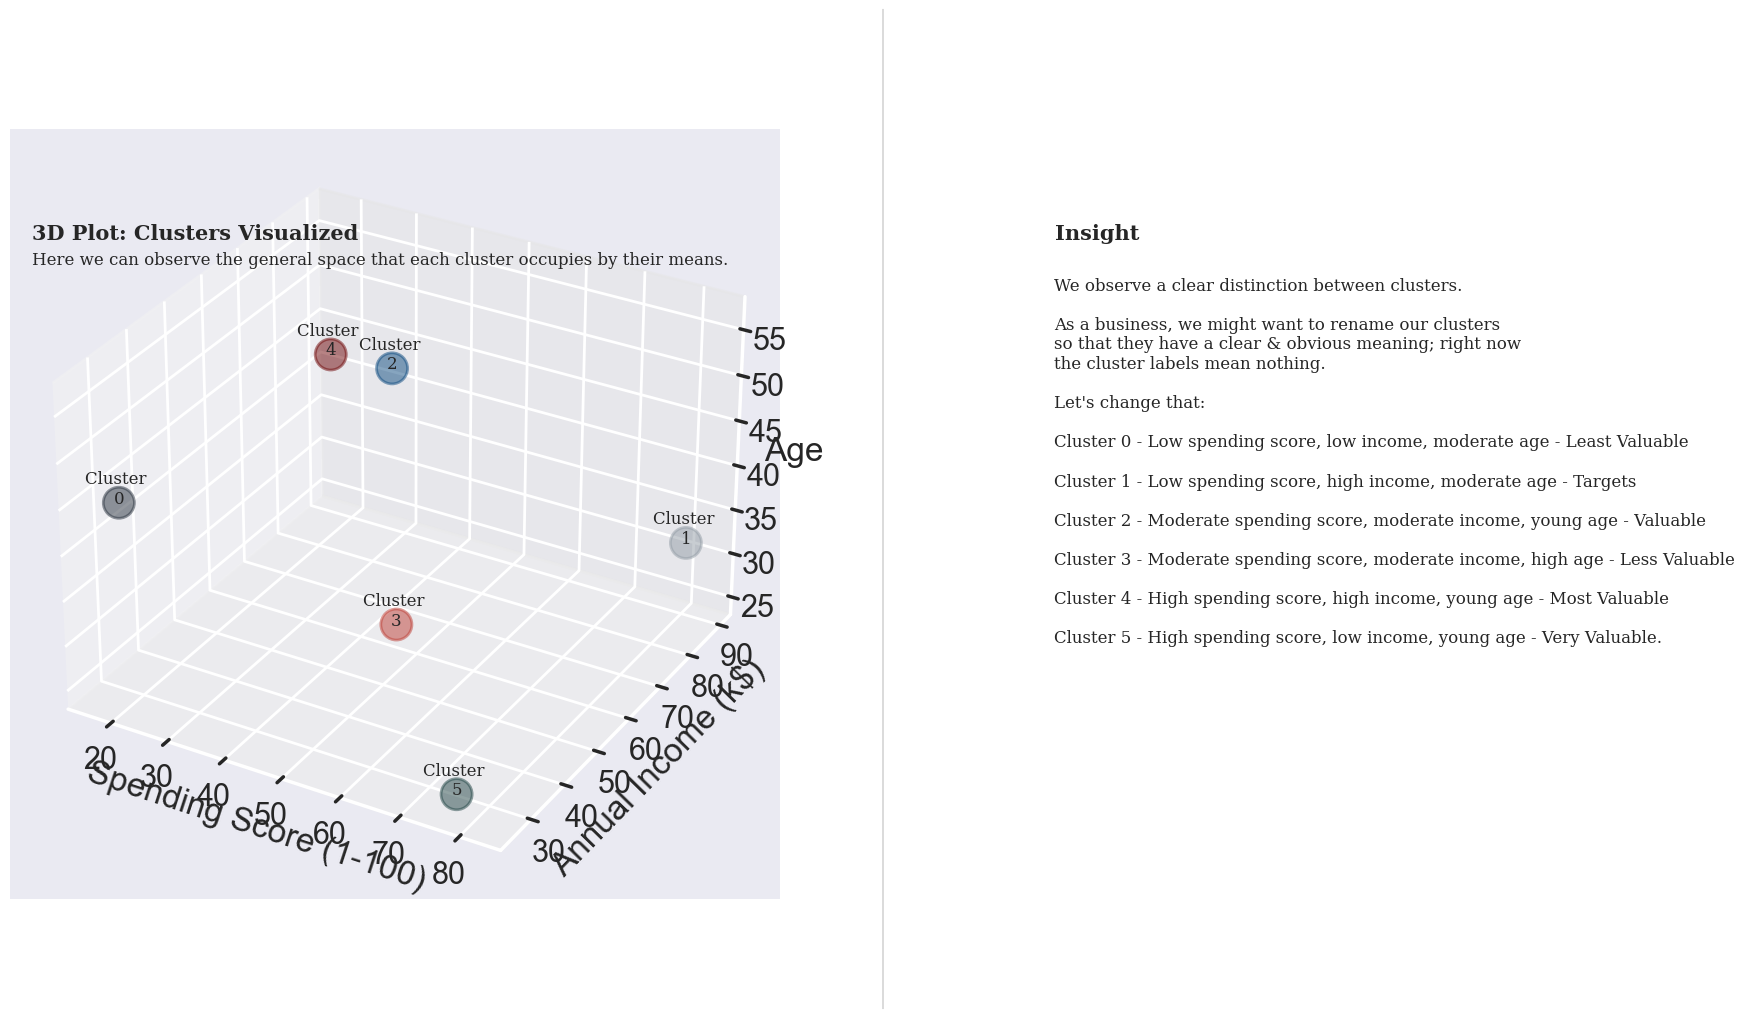

In [132]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(grouped_km2["Spending Score (1-100)"], grouped_km2["Annual Income (k$)"], grouped_km2["Age"],color=['#2a333f','#939da6','#0f4c81','#be3e35','#70090a','#244747'],alpha=0.5,s=500)

# add annotations one by one with a loop
for line in range(0,grouped_km.shape[0]):
     ax.text(grouped_km2['Spending Score (1-100)'][line], grouped_km2['Annual Income (k$)'][line],grouped_km2['Age'][line], s=('Cluster \n'+grouped_km2['Cluster'][line]), horizontalalignment='center', fontsize=12, fontweight='light', fontfamily='serif')
        
ax.set_xlabel("Spending Score (1-100)")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Age")

fig.text(0.15, .77, '3D Plot: Clusters Visualized', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.15, .745, 'Here we can observe the general space that each cluster occupies by their means.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.172, 0.77, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.172, 0.347, '''
We observe a clear distinction between clusters. 

As a business, we might want to rename our clusters
so that they have a clear & obvious meaning; right now
the cluster labels mean nothing. 

Let's change that:

Cluster 0 - Low spending score, low income, moderate age - Least Valuable

Cluster 1 - Low spending score, high income, moderate age - Targets

Cluster 2 - Moderate spending score, moderate income, young age - Valuable

Cluster 3 - Moderate spending score, moderate income, high age - Less Valuable

Cluster 4 - High spending score, high income, young age - Most Valuable

Cluster 5 - High spending score, low income, young age - Very Valuable.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

Now we have our clusters, we can explore how the average customer varies within each of them



In [133]:
cluster_only = clustered_data[['Cluster']]

In [134]:
merge = pd.merge(mall, cluster_only, left_index=True, right_index=True)
merge.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

  Age Range  Gender 1/0 age_band Age Groups  Cluster  
0     Young           1  10 ~ 20   (18, 20]        5  
1     Young           1  20 ~ 30   (20, 30]        5  
2     Young           0  20 ~ 30   (18, 20]        0  
3     Adult           0  20 ~ 30   (20, 30]        5  
4     Adult           0  30 ~ 40   (30, 40]        0

We can give our clusters meanigful names which will help business leaders to understand their importance.

What has more impact: 'We need to advertise to Cluster X' or 'We need to advertise to our High Value Cluster'

This is how we need to communicate our clusters

In [135]:
# Giving our clusters meaningful names

merge['Cluster_Label'] = merge['Cluster'].apply(lambda x: 'Least Valuable' if x == 0 else 
                                               'Targets' if x == 1 else
                                               'Valuable' if x == 2 else
                                               'Less Valuable' if x == 3 else
                                               'Most Valuable' if x == 4 else 'Very Valuable')

# New column for radar plots a bit later on 

merge['Sex (100=Male)'] = merge['Gender'].apply(lambda x: 100 if x == 'Male' else 0)

In [136]:
merge['Cluster'] = merge['Cluster'].map(str)
# Order for plotting categorical vars
Cluster_ord = ['0','1','2','3','4','5']
clus_label_order = ['Targets','Most Valuable','Very Valuable','Valuable','Less Valuable','Least Valuable']

In [137]:
clus_ord = merge['Cluster_Label'].value_counts().index

clu_data = merge['Cluster_Label'].value_counts()[clus_label_order]
##

data_cg = merge.groupby('Cluster_Label')['Gender'].value_counts().unstack().loc[clus_label_order]
data_cg['sum'] = data_cg.sum(axis=1)

##
data_cg_ratio = (data_cg.T / data_cg['sum']).T[['Male', 'Female']][::-1]

# Exploring our Clusters

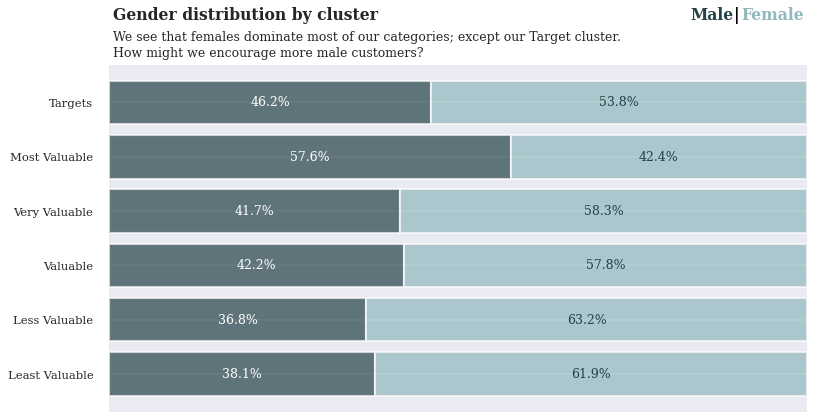

In [138]:
fig, ax = plt.subplots(1,1,figsize=(12, 6), dpi=75)

ax.barh(data_cg_ratio.index, data_cg_ratio['Male'], 
        color='#244247', alpha=0.7, label='Male')
ax.barh(data_cg_ratio.index, data_cg_ratio['Female'], left=data_cg_ratio['Male'], 
        color='#91b8bd', alpha=0.7, label='Female')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels((data_cg_ratio.index), fontfamily='serif', fontsize=11)


# male percentage
for i in data_cg_ratio.index:
    ax.annotate(f"{data_cg_ratio['Male'][i]*100:.3}%", 
                   xy=(data_cg_ratio['Male'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_cg_ratio.index:
    ax.annotate(f"{data_cg_ratio['Female'][i]*100:.3}%", 
                   xy=(data_cg_ratio['Male'][i]+data_cg_ratio['Female'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='#244247')
    

fig.text(0.129, 0.98, 'Gender distribution by cluster', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.129, 0.9, 
         '''
We see that females dominate most of our categories; except our Target cluster.
How might we encourage more male customers?''' , fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend().set_visible(False)

fig.text(0.77,0.98,"Male", fontweight="bold", fontfamily='serif', fontsize=15, color='#244247')
fig.text(0.819,0.98,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.827,0.98,"Female", fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')
plt.show()

Insight

let's focus on an important part of the plot.

Our 'Targets' group, that is, high income customers but low spending scores, are primarily male. How could we exploit this?

# Box Plots

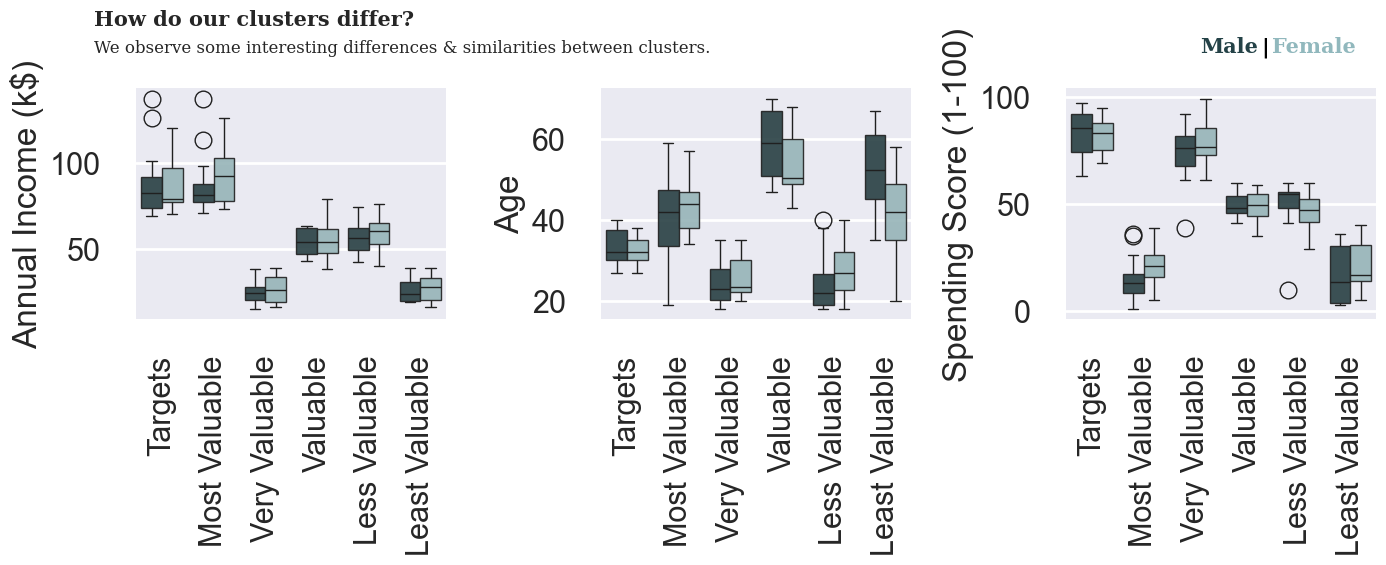

In [140]:
import matplotlib.gridspec as gridspec

# Create 2x2 sub plots
gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(16, 3))

# Title and sub-title

fig.text(0.099, 1.09, 'How do our clusters differ?', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.099, 1, 'We observe some interesting differences & similarities between clusters.', fontsize=12, fontweight='light', fontfamily='serif')

# Grid spec layout

ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax1 = sns.boxplot(x='Cluster_Label',y='Annual Income (k$)',hue='Gender',data=merge,order=['Targets','Most Valuable','Very Valuable','Valuable','Less Valuable','Least Valuable'],palette=['#244247','#91b8bd'],boxprops=dict(alpha=.9))
ax1.legend_.remove() 
ax1.set_xlabel('')

ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax2 = sns.boxplot(x='Cluster_Label',y='Age',hue='Gender',data=merge,order=['Targets','Most Valuable','Very Valuable','Valuable','Less Valuable','Least Valuable'],palette=['#244247','#91b8bd'],boxprops=dict(alpha=.9))
ax2.legend_.remove() 
ax2.set_xlabel('')

ax3 = fig.add_subplot(gs[0, 2]) # row 1, span all columns
ax3 = sns.boxplot(x='Cluster_Label',y='Spending Score (1-100)',hue='Gender',data=merge,order=['Targets','Most Valuable','Very Valuable','Valuable','Less Valuable','Least Valuable'],palette=['#244247','#91b8bd'],boxprops=dict(alpha=.9))
ax3.legend_.remove() 
ax3.set_xlabel('')

sns.despine(right=True)
sns.despine(offset=10, trim=True)

ax.legend().set_visible(False)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)



fig.text(0.79,1,"Male", fontweight="bold", fontfamily='serif', fontsize=15, color='#244247')
fig.text(0.828,1,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.835,1,"Female", fontweight="bold", fontfamily='serif', fontsize=15, color='#91b8bd')


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None) # useful for adjusting space between subplots

# Other ways to visualize differences...
Clusters 2 & 3 (Valuable and Less Valuable) look similar in some respects, let's focus on those two for a moment



# Radar Plots

In [141]:
# Radar Plots
clustered_data = merge


clus0 = clustered_data[clustered_data['Cluster_Label'] == 'Least Valuable']
clus1 = clustered_data[clustered_data['Cluster_Label'] == 'Targets']
clus2 = clustered_data[clustered_data['Cluster_Label'] == 'Valuable']
clus3 = clustered_data[clustered_data['Cluster_Label'] == 'Less Valuable']
clus4 = clustered_data[clustered_data['Cluster_Label'] == 'Most Valuable']
clus5 = clustered_data[clustered_data['Cluster_Label'] == 'Very Valuable']

labels=np.array(['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Sex (100=Male)'])
stats0=clus0.loc[:,labels].mean()
stats1=clus1.loc[:,labels].mean()
stats2=clus2.loc[:,labels].mean()
stats3=clus3.loc[:,labels].mean()
stats4=clus4.loc[:,labels].mean()
stats5=clus5.loc[:,labels].mean()


angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats0=np.concatenate((stats0,[stats0[0]]))
stats1=np.concatenate((stats1,[stats1[0]]))
stats2=np.concatenate((stats2,[stats2[0]]))
stats3=np.concatenate((stats3,[stats3[0]]))
stats4=np.concatenate((stats4,[stats4[0]]))
stats5=np.concatenate((stats5,[stats5[0]]))


angles=np.concatenate((angles,[angles[0]]))

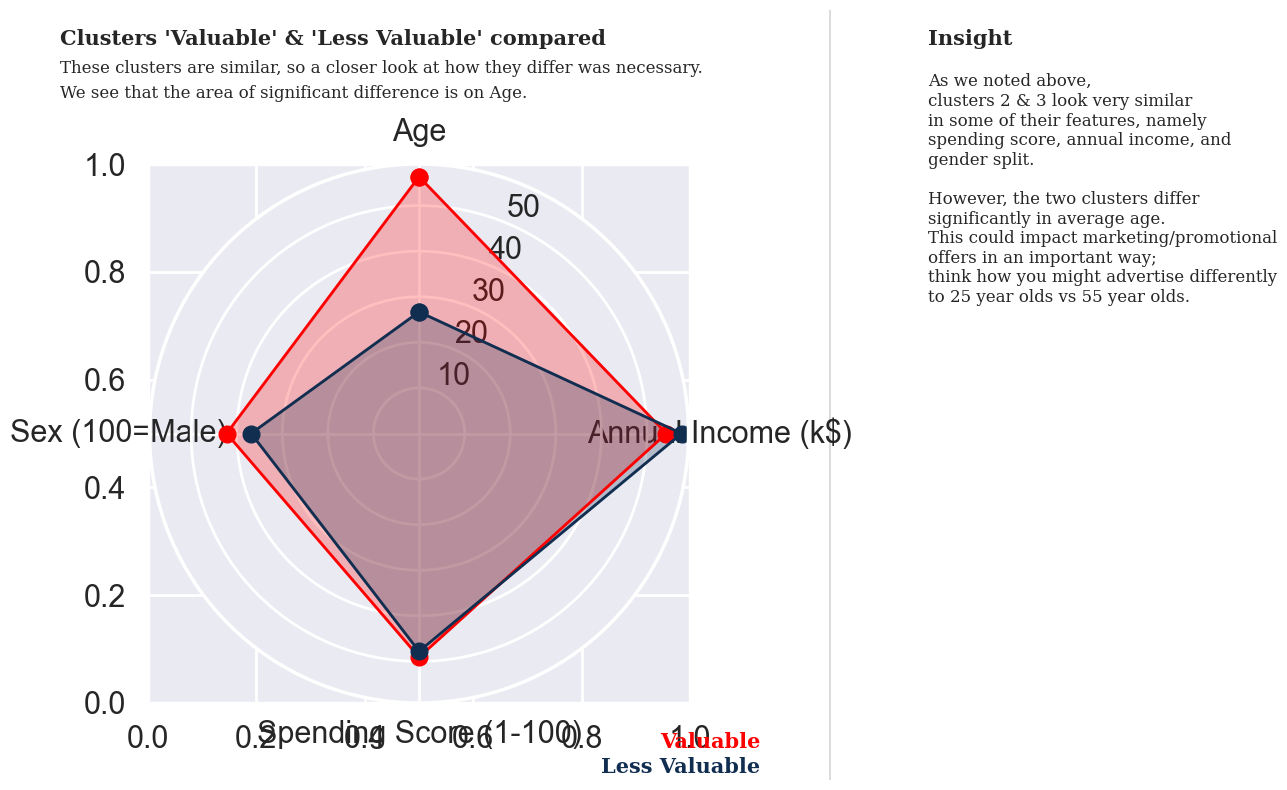

In [142]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
fig, ax = plt.subplots(1, 1, figsize=(7,7))

ax = plt.subplot(111, polar=True)

ax.plot(angles, stats2, 'o-', linewidth=2, color='#ff0000', label="Cluster 2: Valuable")
ax.fill(angles, stats2, color='#ff0000',alpha=0.25)

ax.plot(angles, stats3, 'o-', linewidth=2,color='#112e51',label="Cluster 3: Less Valuable")
ax.fill(angles, stats3, color='#112e51',alpha=0.25)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids((angles * 180/np.pi)[0:4],labels) # Chnage this to match label count


fig.text(0, 1.05, "Clusters 'Valuable' & 'Less Valuable' compared", fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0,1.01, 'These clusters are similar, so a closer look at how they differ was necessary.', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0,0.975, 'We see that the area of significant difference is on Age.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.24, 1.05, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.24, 0.655, '''
As we noted above, 
clusters 2 & 3 look very similar 
in some of their features, namely
spending score, annual income, and
gender split.

However, the two clusters differ 
significantly in average age. 
This could impact marketing/promotional
offers in an important way;
think how you might advertise differently
to 25 year olds vs 55 year olds.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

import matplotlib.lines as lines
l1 = lines.Line2D([1.1, 1.1], [0, 1.1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

fig.text(1,0.045,"Valuable", fontweight="bold", fontfamily='serif', ha='right',fontsize=15, color='#ff0000')
fig.text(1,0.01,"Less Valuable", fontweight="bold", fontfamily='serif',ha='right', fontsize=15, color='#112e51')

ax.grid(True)

# Other Clustering Techniques

# DBSCAN_Cluster

In [163]:
# Select relevant features for clustering
features = mall[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Normalize the features
features_normalized = (features - features.mean()) / features.std()

# Helper function for plotting clusters
def plot_clusters(algorithm_name, clusters, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue=clusters, data=mall, palette="viridis")
    plt.title(f"{algorithm_name} Clustering of Mall Customers - {title}")
    plt.show()

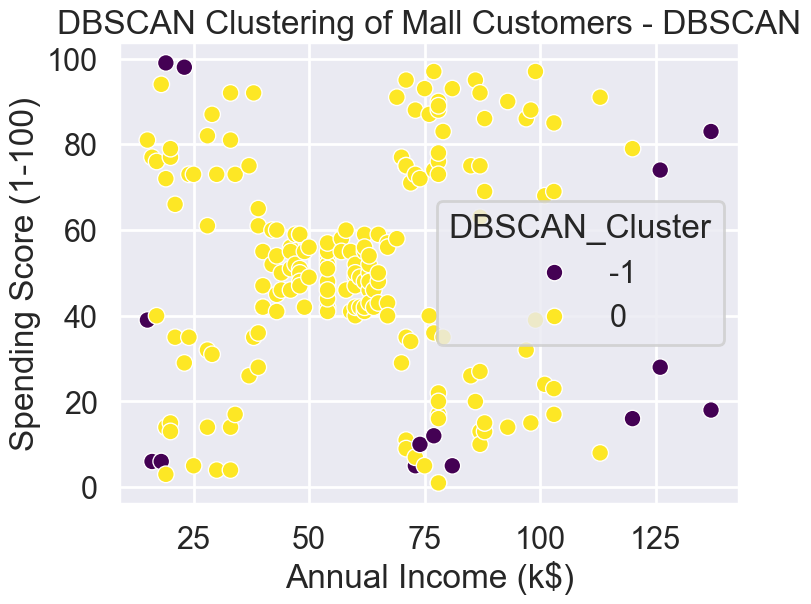

In [164]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
# DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
mall["DBSCAN_Cluster"] = dbscan.fit_predict(features_normalized)
plot_clusters("DBSCAN", mall["DBSCAN_Cluster"], "DBSCAN")

# Mean Shift

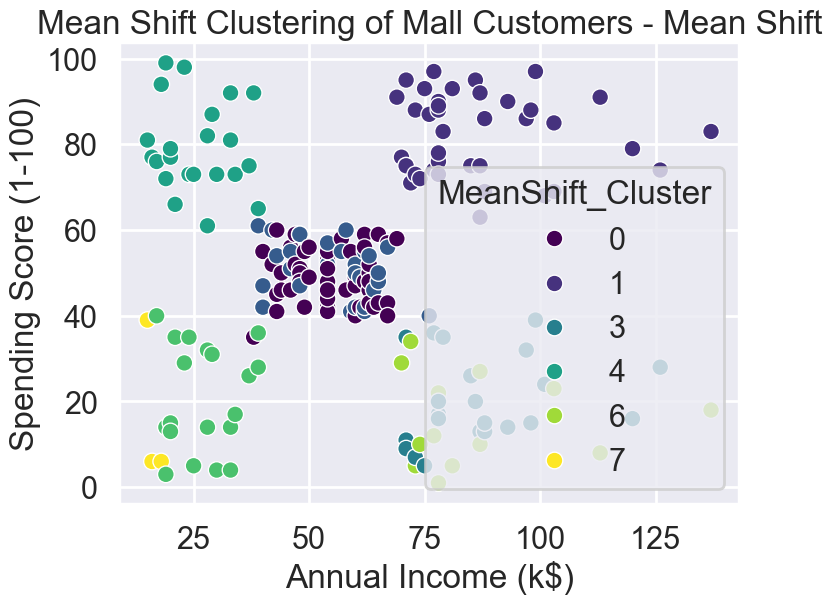

In [165]:

meanshift = MeanShift(bandwidth=1)
mall["MeanShift_Cluster"] = meanshift.fit_predict(features_normalized)
plot_clusters("Mean Shift", mall["MeanShift_Cluster"], "Mean Shift")


# Gaussian Mixture Model (GMM)

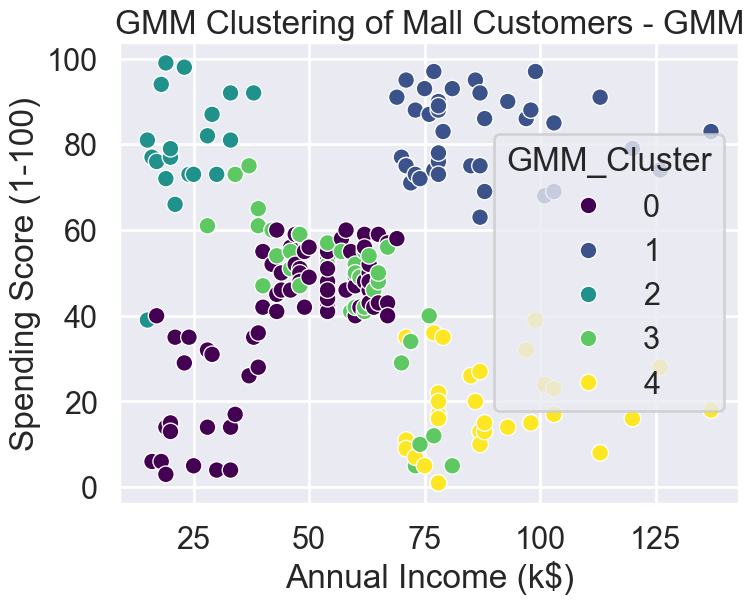

In [167]:

gmm = GaussianMixture(n_components=5, random_state=42)
mall["GMM_Cluster"] = gmm.fit_predict(features_normalized)
plot_clusters("GMM", mall["GMM_Cluster"], "GMM")

# Helper function for plotting clusters

In [171]:

def plot_clusters(algorithm_name, clusters, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue=clusters, data=mall, palette="viridis")
    plt.title(f"{algorithm_name} Clustering of Mall Customers - {title}")
    plt.show()

# Helper function for evaluating clustering
def evaluate_clustering(algorithm_name, clusters, title):
    silhouette = silhouette_score(features_normalized, clusters)
    davies_bouldin = davies_bouldin_score(features_normalized, clusters)
    print(f"{algorithm_name} Clustering Evaluation - {title}")
    print(f"Silhouette Score: {silhouette}")
    print(f"Davies-Bouldin Index: {davies_bouldin}\n")

# K-Fold Cross-Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
mall["KMeans_Cluster"] = kmeans.fit_predict(features_normalized)
evaluate_clustering("K-Means", mall["KMeans_Cluster"], "K-Means")

# Hierarchical Clustering (Agglomerative)
hc_agglomerative = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
mall["Hierarchical_Agglomerative_Cluster"] = hc_agglomerative.fit_predict(features_normalized)
evaluate_clustering("Hierarchical", mall["Hierarchical_Agglomerative_Cluster"], "Hierarchical (Agglomerative)")

# Hierarchical Clustering (Divisive)
# For divisive clustering, we use fcluster with 'maxclust' to specify the desired number of clusters
linkage_matrix = linkage(features_normalized, method='complete', metric='euclidean')
divisive_clusters = fcluster(linkage_matrix, t=5, criterion='maxclust')
mall["Hierarchical_Divisive_Cluster"] = divisive_clusters - 1  # Adjust for 0-based indexing
evaluate_clustering("Hierarchical", mall["Hierarchical_Divisive_Cluster"], "Hierarchical (Divisive)")

# DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
mall["DBSCAN_Cluster"] = dbscan.fit_predict(features_normalized)
evaluate_clustering("DBSCAN", mall["DBSCAN_Cluster"], "DBSCAN")

# Mean Shift
meanshift = MeanShift(bandwidth=1)
mall["MeanShift_Cluster"] = meanshift.fit_predict(features_normalized)
evaluate_clustering("Mean Shift", mall["MeanShift_Cluster"], "Mean Shift")

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
mall["Agglomerative_Cluster"] = agg_clustering.fit_predict(features_normalized)
evaluate_clustering("Agglomerative", mall["Agglomerative_Cluster"], "Agglomerative")

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=5, random_state=42)
mall["GMM_Cluster"] = gmm.fit_predict(features_normalized)
evaluate_clustering("GMM", mall["GMM_Cluster"], "GMM")

K-Means Clustering Evaluation - K-Means
Silhouette Score: 0.41664341513732767
Davies-Bouldin Index: 0.874551051002418

Hierarchical Clustering Evaluation - Hierarchical (Agglomerative)
Silhouette Score: 0.3900282618626721
Davies-Bouldin Index: 0.9162886109753658

Hierarchical Clustering Evaluation - Hierarchical (Divisive)
Silhouette Score: 0.3999821356530836
Davies-Bouldin Index: 0.8847668365863903

DBSCAN Clustering Evaluation - DBSCAN
Silhouette Score: 0.24288510985732523
Davies-Bouldin Index: 3.444911656694078
Mean Shift Clustering Evaluation - Mean Shift
Silhouette Score: 0.39590189556031957
Davies-Bouldin Index: 0.9350077649536312

Agglomerative Clustering Evaluation - Agglomerative
Silhouette Score: 0.32148866683112387
Davies-Bouldin Index: 1.1277290061047858

GMM Clustering Evaluation - GMM
Silhouette Score: 0.376440749908192
Davies-Bouldin Index: 0.8901678148080802


# Create a DataFrame to store clustering results

In [175]:


results_list = []

# Function to add results to the list
def add_result(algorithm_name, silhouette_score, davies_bouldin_index):
    results_list.append({
        "Algorithm": algorithm_name,
        "Silhouette Score": silhouette_score,
        "Davies-Bouldin Index": davies_bouldin_index
    })

# K-Means
add_result("K-Means", 0.417, 0.875)

# Hierarchical Clustering (Agglomerative)
add_result("Hierarchical (Agglomerative)", 0.390, 0.916)

# Hierarchical Clustering (Divisive)
add_result("Hierarchical (Divisive)", 0.400, 0.885)

# DBSCAN
add_result("DBSCAN", 0.243, 3.445)

# Mean Shift
add_result("Mean Shift", 0.396, 0.935)

# Agglomerative Clustering
add_result("Agglomerative", 0.321, 1.128)

# GMM
add_result("GMM", 0.376, 0.890)

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

# Display the results DataFrame
print(results_df)


                      Algorithm  Silhouette Score  Davies-Bouldin Index
0                       K-Means             0.417                 0.875
1  Hierarchical (Agglomerative)             0.390                 0.916
2       Hierarchical (Divisive)             0.400                 0.885
3                        DBSCAN             0.243                 3.445
4                    Mean Shift             0.396                 0.935
5                 Agglomerative             0.321                 1.128
6                           GMM             0.376                 0.890


# Conclusion and Recommendations

Recommendations
After examining the data presented, the following suggestions could be taken into account.

Enhance emphasis on Clusters one(1) and two(2): These clusters exhibited the most substantial revenue during the analyzed period, due to their elevated spending score. Consequently, it would be prudent to allocate additional time and resources towards effectively marketing to the customers within these clusters, thereby maximizing their revenue potential even further.
Enhance marketing initiatives targeting female customers: The top three clusters, comprising clusters one(1), three(3), and zero(0) combined, exhibited a notably higher representation of female customers compared to male customers. Consequently, directing marketing endeavors towards this demographic holds the potential to boost sales.
Focus on customers aged 45 and below: This is as they tend to exhibit a higher spending score compared to older age groups. Intuitively, this demographic contributes significantly to the overall revenue. Consequently, directing marketing efforts more towards this group can potentially boost revenue further, while still recognizing the importance of other age groups.
Examine the customers within the zero(0) cluster: This particular group of customers exhibits moderate spending scores and annual income levels. It is recommended that the management further investigates their demographic characteristics including products purchased, e.t.c to target the customers remarkably.
Examine items purchased by customers in the top three clusters: Analyzing the items purchased by customers in the top 3 clusters can reveal which products or services are most popular among these groups. Exploring the differences or similarities in item preferences between the clusters can provide this business with valuable information which can be used to optimize marketing strategies, tailor promotions, and even guide product development to better meet the needs and preferences of these high-potential customer segments.


To conclude, based on the findings of the project, it is evident that younger females are the primary spenders and active participants in this business. While it’s crucial to retain the existing customer base and not disregarding the other demographics, it is recommended that the business focuses on targeted marketing efforts aimed at younger females in the region. This group has shown a higher spending score, making them a valuable segment to tap into.

The team should delve deeper into the purchasing behavior of the customers in the top three segments and identify common products they frequently buy. By promoting these products through discount sales and other incentives, the business can attract more traffic while still retaining its current customer base. This strategic approach has the potential to generate increased revenue and customer retention for the business.